**Made by - Rishabh Gupta**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
#linear regression_model
from sklearn.linear_model import LinearRegression
#model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

In [3]:
data_main = pd.read_csv('C:/Users/risha/Downloads/INNHotelsGroup.csv')

In [4]:
data = data_main.copy()

In [5]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
data.describe(include= 'all').T

count unique           top   freq  \
Booking_ID                                 36275  36275      INN00001      1   
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
Booking_ID                                  NaN      NaN        NaN   
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
Booking_ID                                  NaN        NaN        NaN   
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   

In [93]:
data[data.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
#Dropping Booking_Id column, as with unique values will have almost no predictive power for the Machine Learning problem.

data = data.drop(["Booking_ID"], axis=1)
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [11]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

In [12]:
# view what are the values in object data types
cat_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
**************************************************
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
**************************************************
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
**************************************************
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
**************************************************


<Figure size 1400x1000 with 0 Axes>

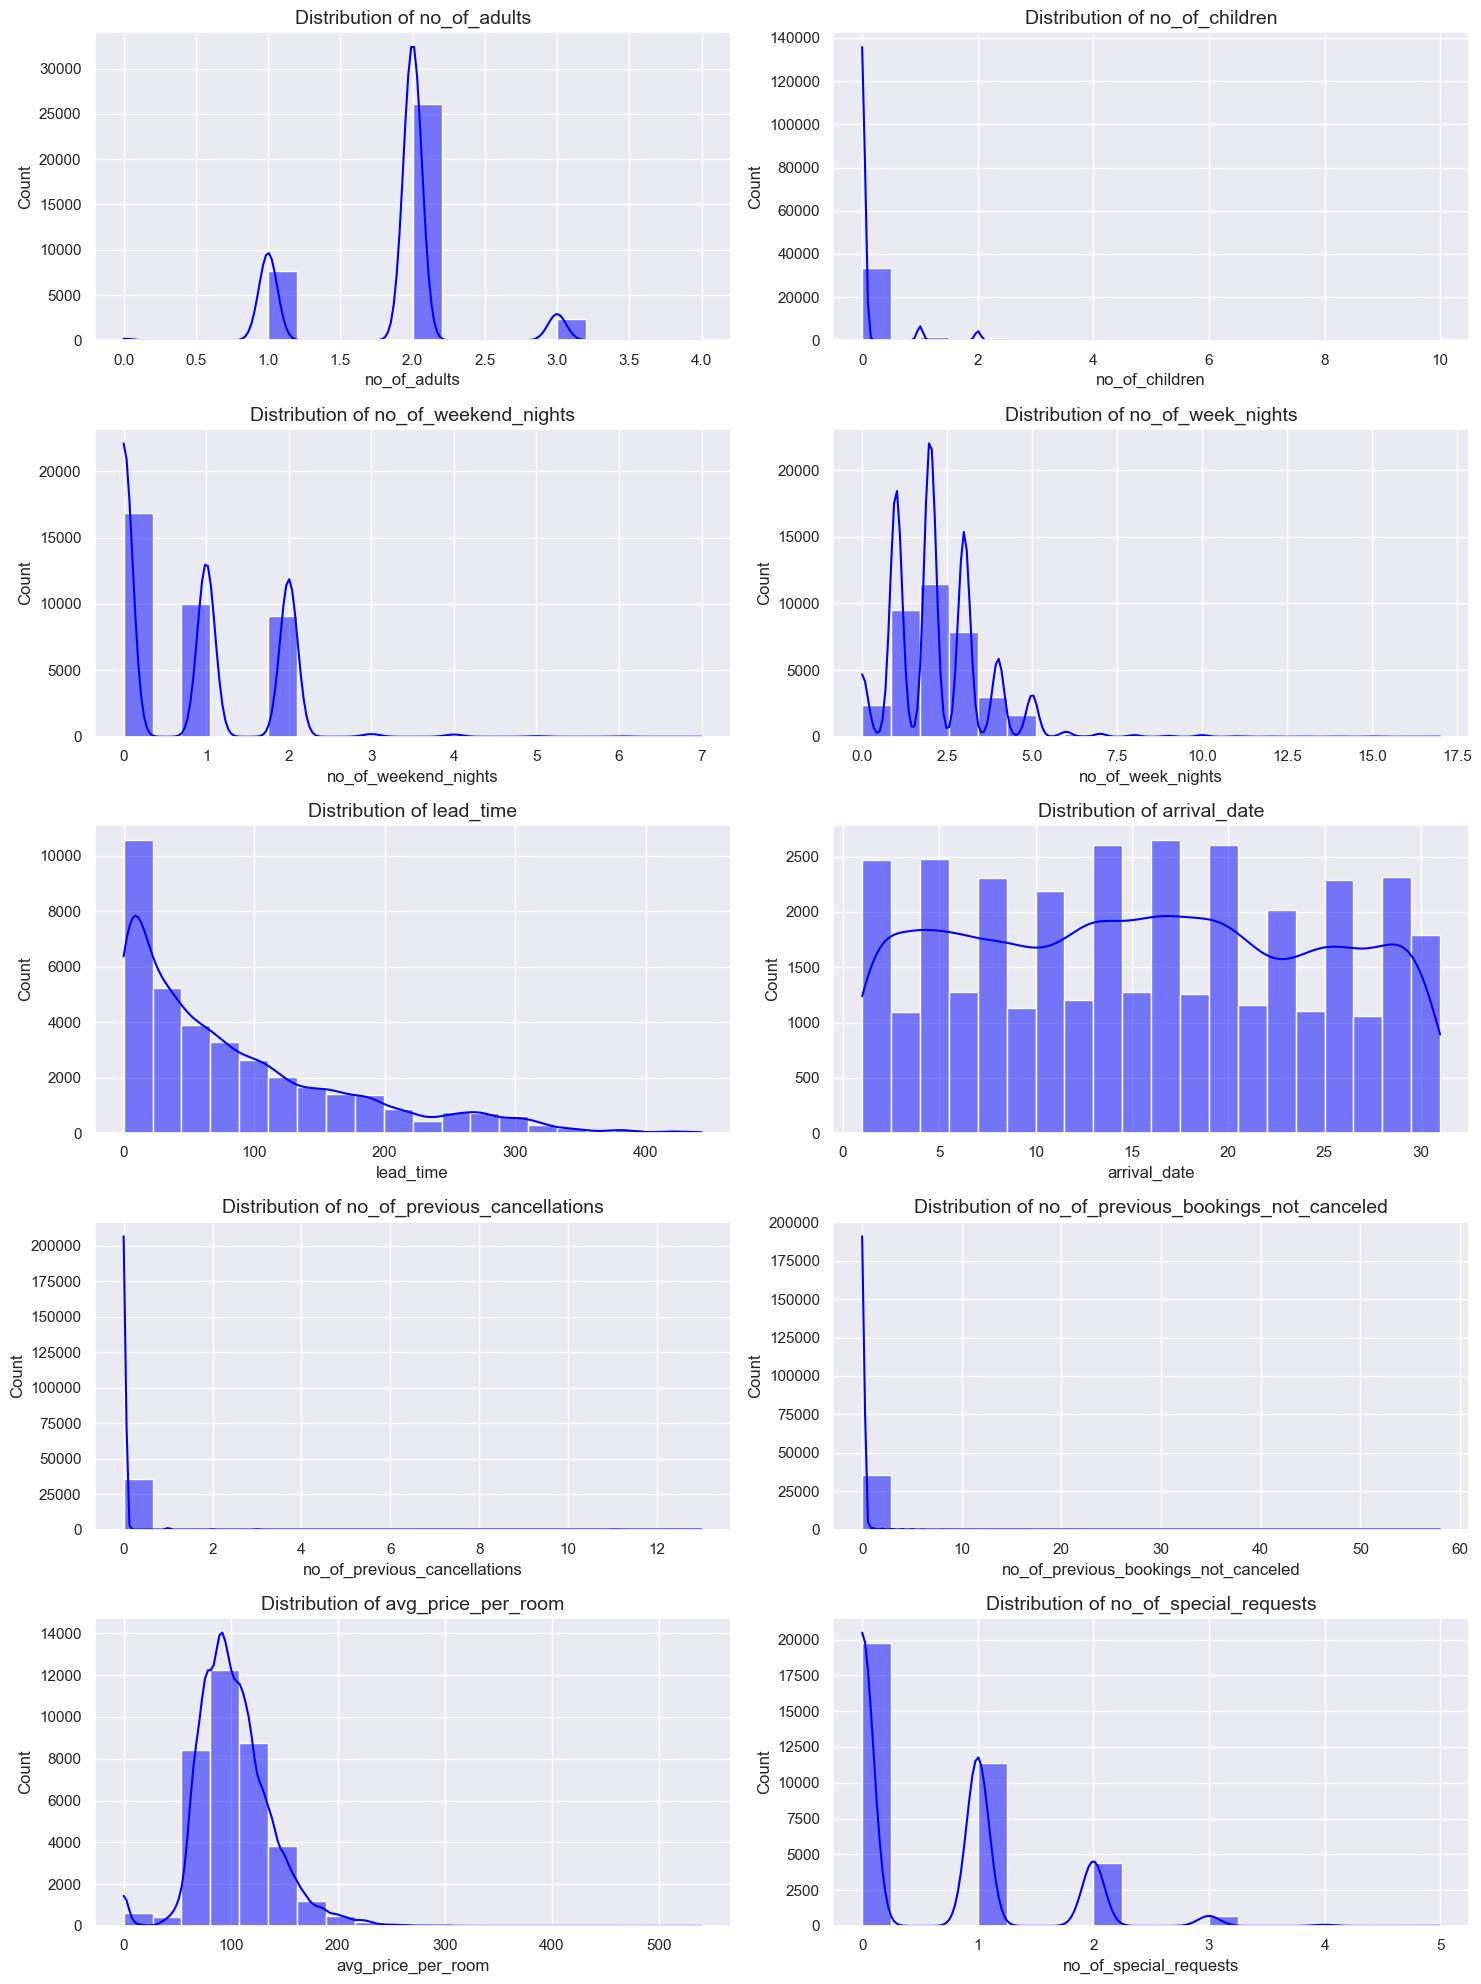

In [6]:
columns = [
    'no_of_adults', 
    'no_of_children', 
    'no_of_weekend_nights', 
    'no_of_week_nights', 
    'lead_time', 
    'arrival_date', 
    'no_of_previous_cancellations', 
    'no_of_previous_bookings_not_canceled', 
    'avg_price_per_room', 
    'no_of_special_requests'
]


# Setting up the figure and axes for multiple subplots
plt.figure(figsize=(14, 10))

# Set up a 5x2 grid for 10 subplots
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns of subplots
    sns.histplot(data[column], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {column}', fontsize=14)

plt.tight_layout()
plt.show()



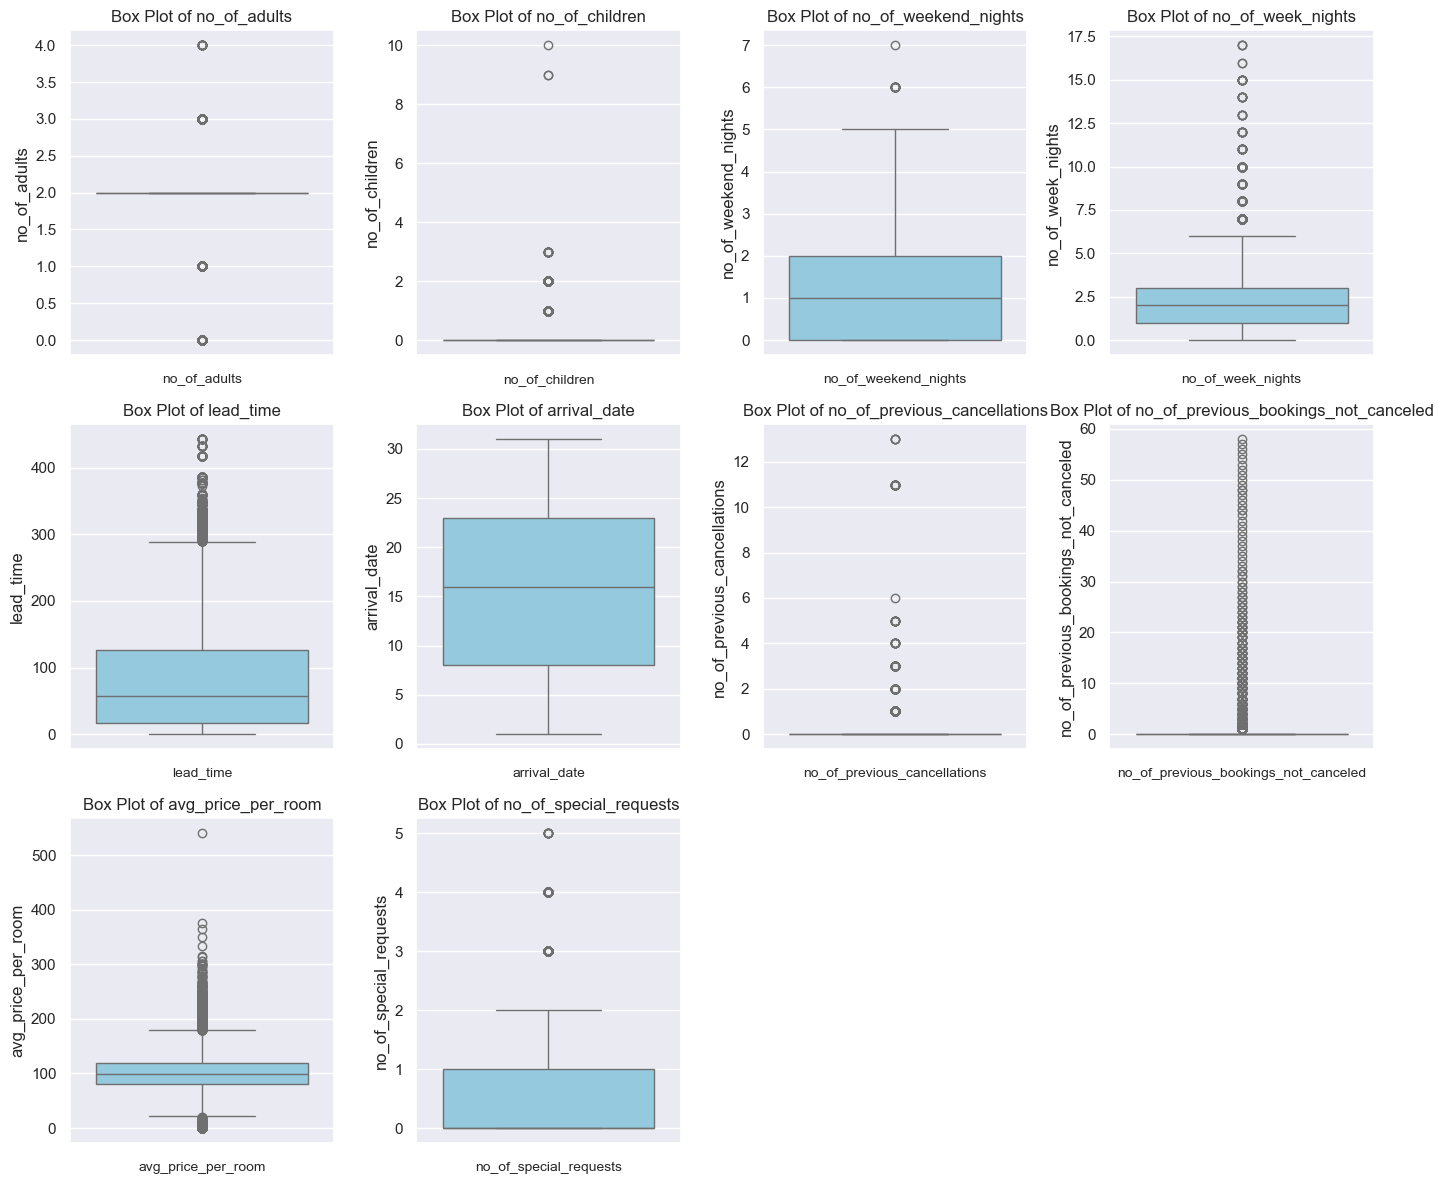

In [6]:

n_columns = [   'no_of_adults', 
                'no_of_children', 
                'no_of_weekend_nights', 
                'no_of_week_nights', 
                'lead_time', 
                'arrival_date', 
                'no_of_previous_cancellations', 
                'no_of_previous_bookings_not_canceled', 
                'avg_price_per_room', 
                'no_of_special_requests']

# Setting up the figure and axes for multiple subplots
plt.figure(figsize=(14, 12))

# Loop through the columns and create a box plot for each
for i, column in enumerate(n_columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns of subplots to fit 10 variables
    sns.boxplot(data=data[column], color='skyblue')
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)

plt.tight_layout()
plt.show()


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def labeled_barplot(ax, data, feature, perc=False, n=None):
    """
    Barplot with both count and percentage labels on top.
    
    Parameters:
    - ax (matplotlib.axes): The subplot axis where the bar plot will be drawn.
    - data (DataFrame): The DataFrame containing the data.
    - feature (str): The categorical feature to plot.
    - perc (bool): If True, display percentage labels; otherwise, display counts.
    - n (int): Limit the number of unique values displayed.
    """
    total = len(data[feature])

    # Colorful palette and bar plot with ordered bars
    sns.countplot(
        ax=ax,
        data=data,
        x=feature,
        palette="Set3",  # Use a vibrant color palette
        order=data[feature].value_counts().index[:n]
    )

    # Add both count and percentage labels on each bar
    for p in ax.patches:
        count = p.get_height()
        percentage = "{:.1f}%".format(100 * count / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            f'{count}\n({percentage})',  # Show both count and percentage
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 8),
            textcoords="offset points"
        )
    
    # Set plot titles, labels, and grid
    ax.set_title(f'{feature} Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature, fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    ax.tick_params(axis='x', rotation=45)


C:\Users\risha\AppData\Local\Temp\ipykernel_7432\1186456109.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\risha\AppData\Local\Temp\ipykernel_7432\1186456109.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


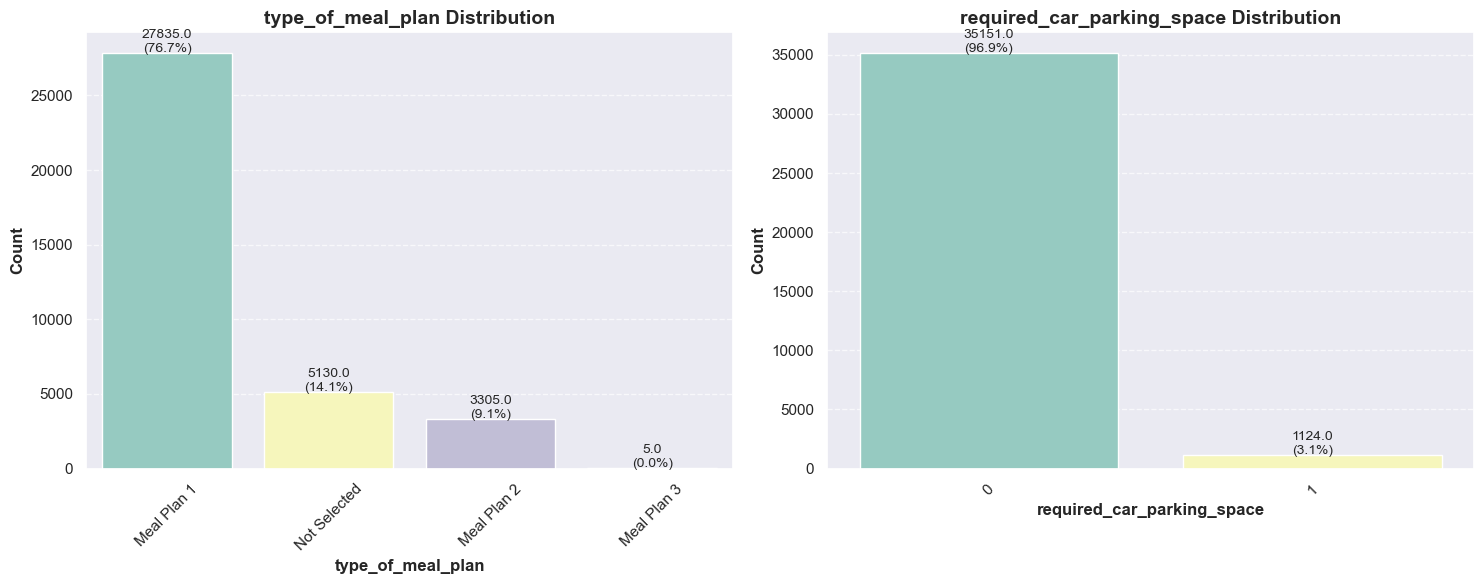

In [14]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

labeled_barplot(axes[0], data, 'type_of_meal_plan', perc=True)
labeled_barplot(axes[1], data, 'required_car_parking_space', perc=True)

plt.tight_layout()
plt.show()


C:\Users\risha\AppData\Local\Temp\ipykernel_7432\1186456109.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\risha\AppData\Local\Temp\ipykernel_7432\1186456109.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


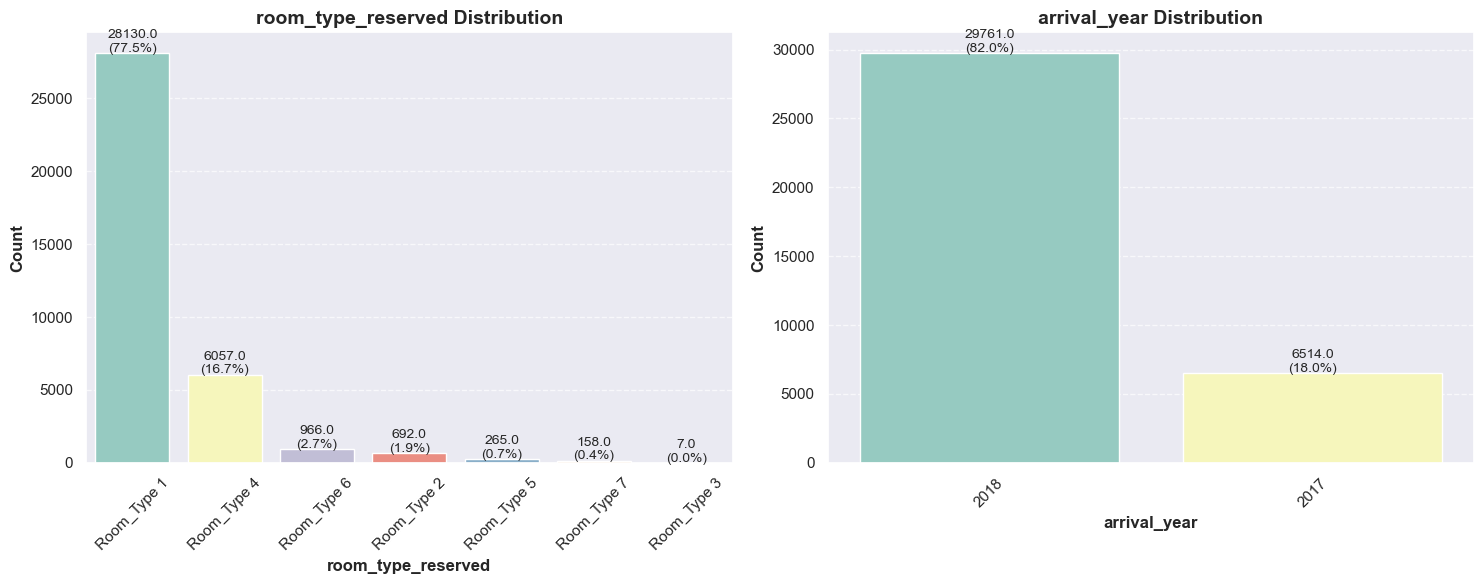

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

labeled_barplot(axes[0], data, 'room_type_reserved', perc=True)
labeled_barplot(axes[1], data, 'arrival_year', perc=True)

plt.tight_layout()
plt.show()

C:\Users\risha\AppData\Local\Temp\ipykernel_7432\1186456109.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\risha\AppData\Local\Temp\ipykernel_7432\1186456109.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


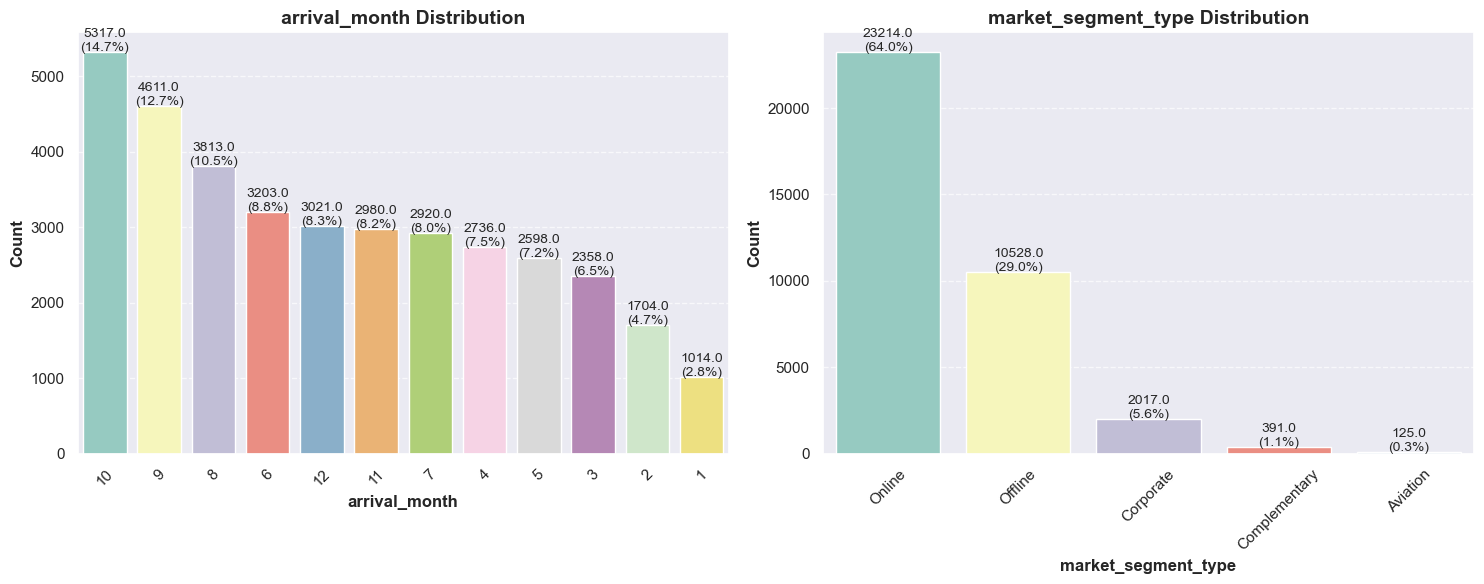

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

labeled_barplot(axes[0], data, 'arrival_month', perc=True)
labeled_barplot(axes[1], data, 'market_segment_type', perc=True)

plt.tight_layout()
plt.show()

C:\Users\risha\AppData\Local\Temp\ipykernel_7432\1186456109.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\risha\AppData\Local\Temp\ipykernel_7432\1186456109.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


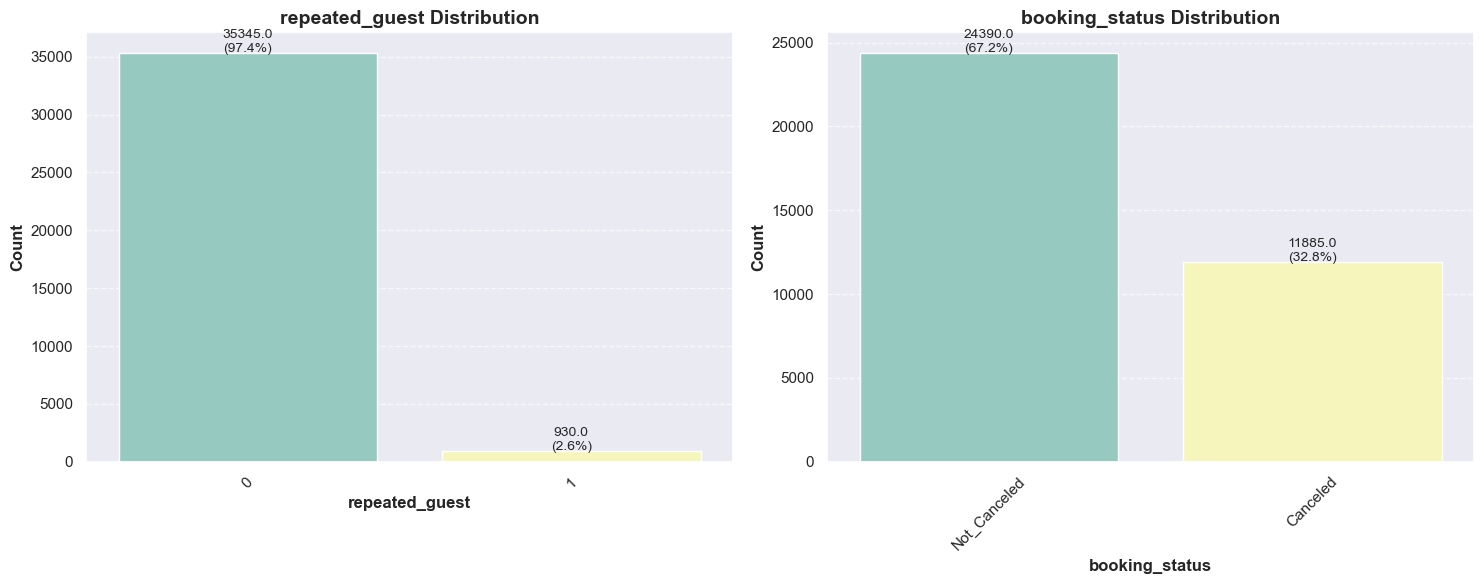

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

labeled_barplot(axes[0], data, 'repeated_guest', perc=True)
labeled_barplot(axes[1], data, 'booking_status', perc=True)

plt.tight_layout()
plt.show()

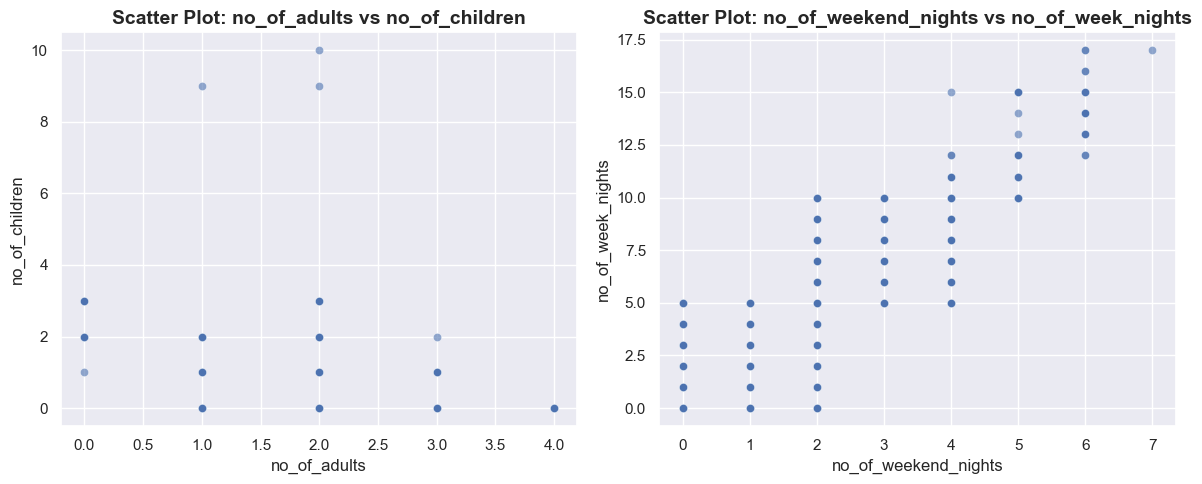

In [24]:

# List of variable pairs for scatter plots
scatter_pairs = [
    ('no_of_adults', 'no_of_children'),
    ('no_of_weekend_nights', 'no_of_week_nights'),

]

# Set the number of rows and columns for the subplots
num_plots = len(scatter_pairs)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # Calculate number of rows needed

# Create a figure and axes for the scatter plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each pair and create a scatter plot
for i, (x_col, y_col) in enumerate(scatter_pairs):
    sns.scatterplot(data=data, x=x_col, y=y_col, ax=axes[i], alpha=0.6, edgecolor='w')
    axes[i].set_title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(x_col, fontsize=12)
    axes[i].set_ylabel(y_col, fontsize=12)
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


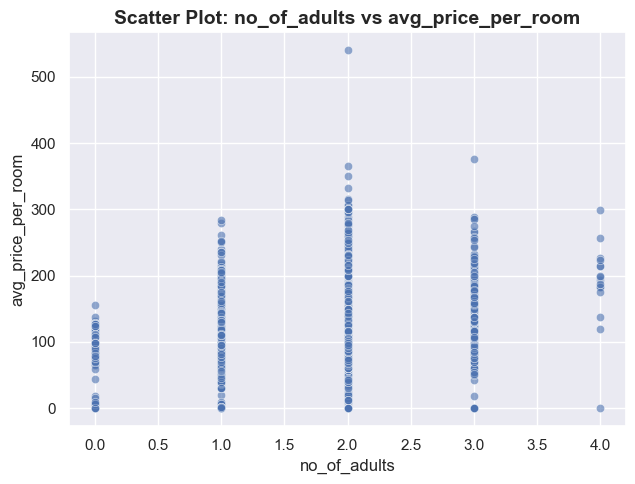

In [8]:
scatter_pairs = [
   
    ('no_of_adults', 'avg_price_per_room'),
   
]

# Set the number of rows and columns for the subplots
num_plots = len(scatter_pairs)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # Calculate number of rows needed

# Create a figure and axes for the scatter plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each pair and create a scatter plot
for i, (x_col, y_col) in enumerate(scatter_pairs):
    sns.scatterplot(data=data, x=x_col, y=y_col, ax=axes[i], alpha=0.6, edgecolor='w')
    axes[i].set_title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(x_col, fontsize=12)
    axes[i].set_ylabel(y_col, fontsize=12)
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

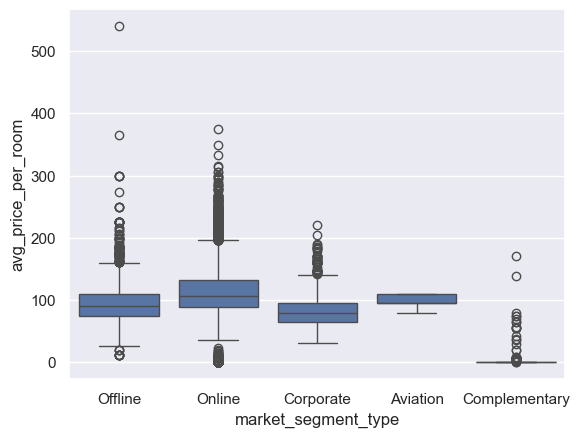

In [28]:
sns.boxplot(data=data, y='avg_price_per_room' , x='market_segment_type')

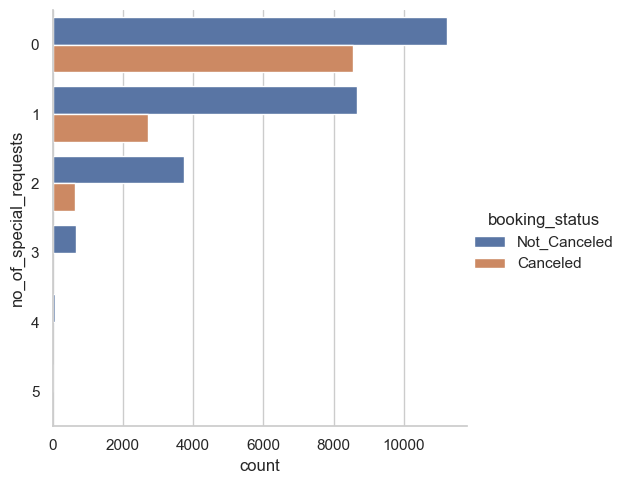

In [31]:
sns.catplot(data=data, y='no_of_special_requests', hue='booking_status', kind='count' )

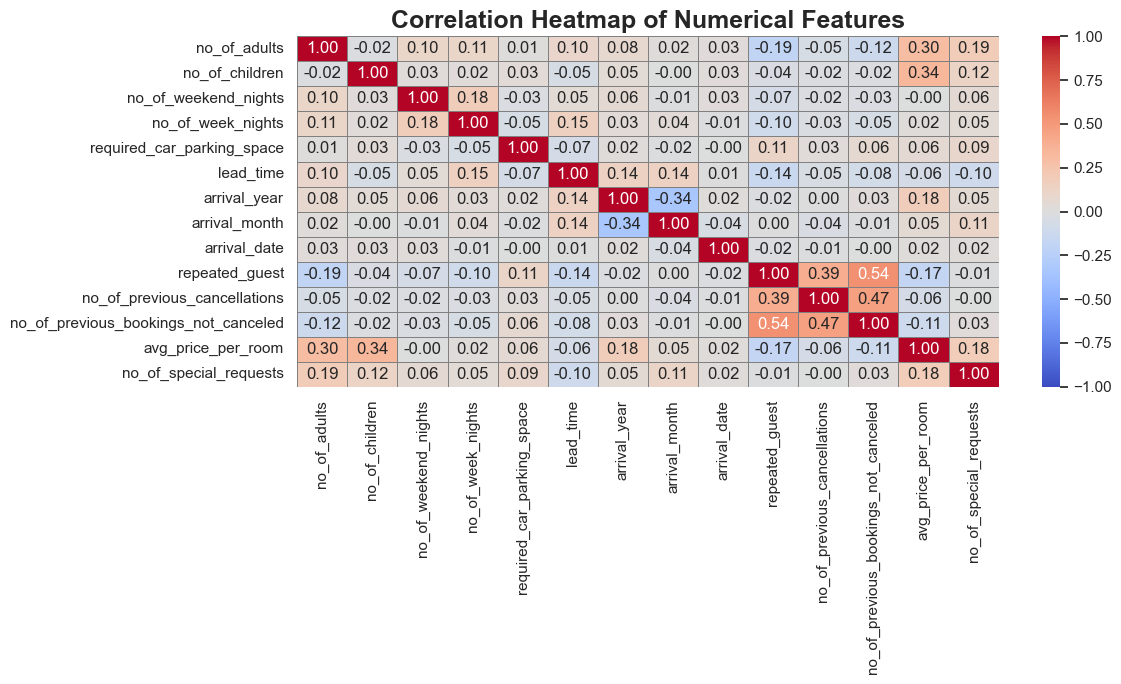

In [34]:
## Correlation map


# Select numeric columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Set the figure size
plt.figure(figsize=(12, 7))

# Create a heatmap with a color palette
sns.heatmap(
    data[cols_list].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt='.2f',
    cmap='coolwarm',  
    center=0,  # Center the colormap at 0 for clearer positive/negative distinction
    linewidths=.5, 
    linecolor='gray',  
)

# Set title and adjust layout
plt.title('Correlation Heatmap of Numerical Features', fontsize=18, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()


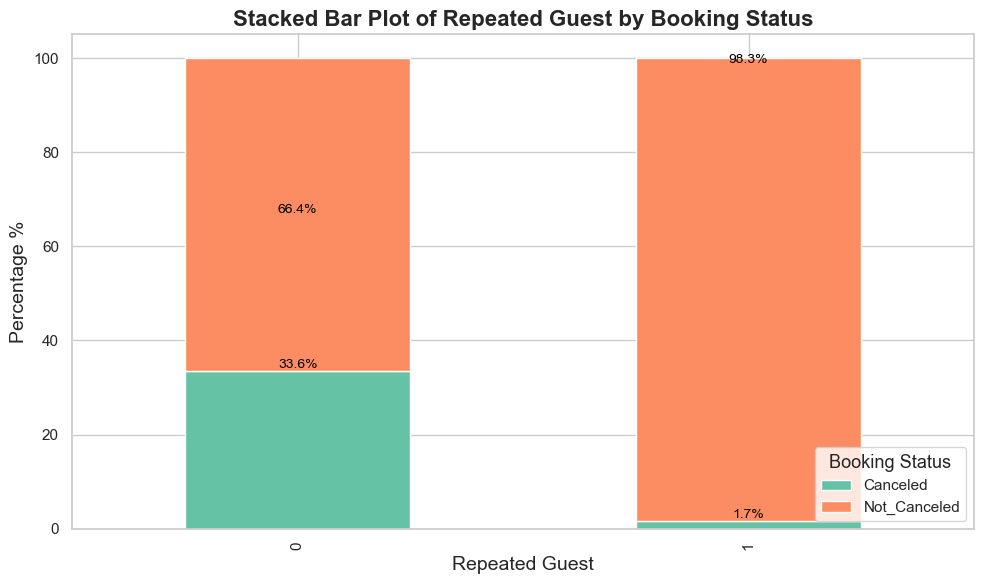

In [40]:

def stacked_barplot(data, predictor, target, figsize=(10, 6)):
 
    # Calculate percentage crosstab
    percent_data = pd.crosstab(data[predictor], data[target], normalize='index') * 100

    # Set the color palette
    palette = sns.color_palette("Set2", len(percent_data.columns))

    # Create the stacked bar plot
    ax = percent_data.plot(kind='bar', figsize=figsize, stacked=True, color=palette)

    # Annotate bars with percentages
    for p in ax.patches:
        # Get the height of each bar for percentage annotation
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')

    # Set labels and title
    plt.title(f'Stacked Bar Plot of {predictor.replace("_", " ").title()} by {target.replace("_", " ").title()}', fontsize=16, fontweight='bold')
    plt.ylabel('Percentage %', fontsize=14)
    plt.xlabel(predictor.replace("_", " ").title(), fontsize=14)
    
    # Add legend
    plt.legend(title=target.replace("_", " ").title(), title_fontsize='13', fontsize='11', loc="lower right")

    # Show the plot
    plt.tight_layout()
    plt.show()

stacked_barplot(data, 'repeated_guest', 'booking_status')


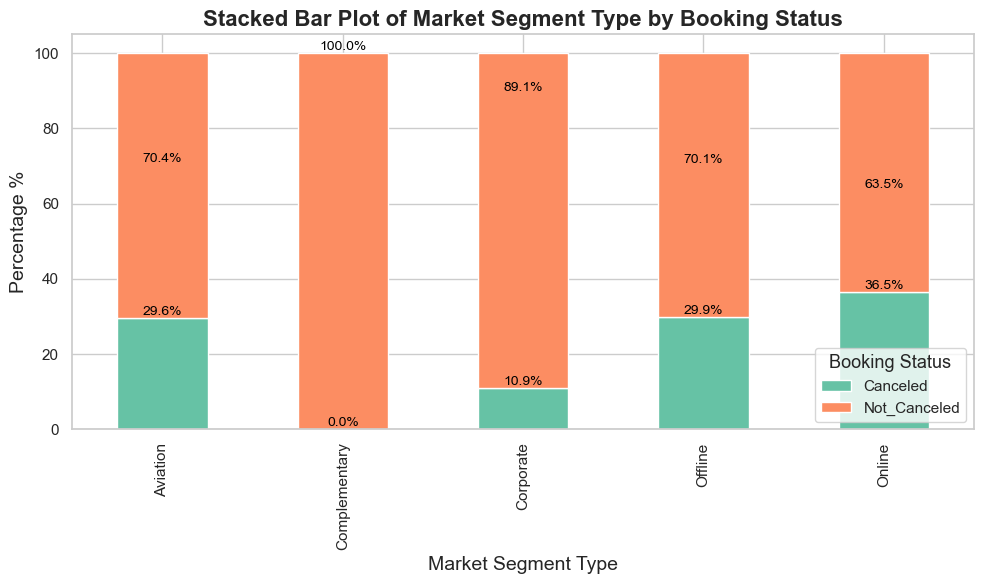

In [41]:
stacked_barplot(data, 'market_segment_type', 'booking_status')

C:\Users\risha\AppData\Local\Temp\ipykernel_7432\3696758545.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)


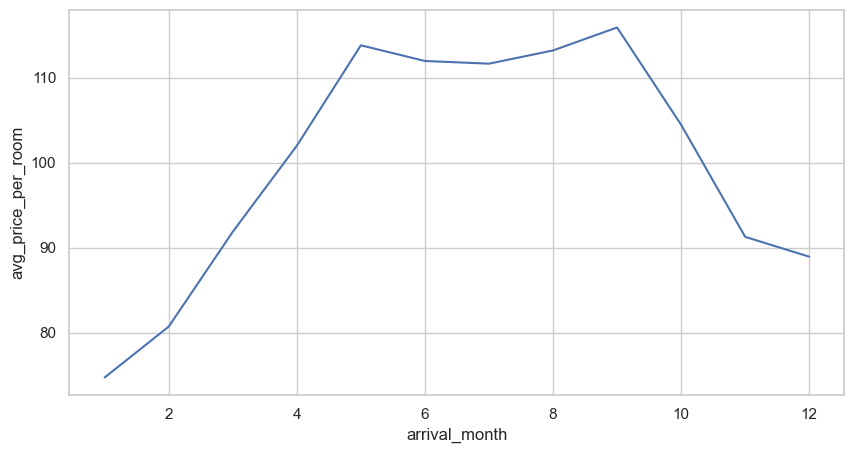

In [43]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

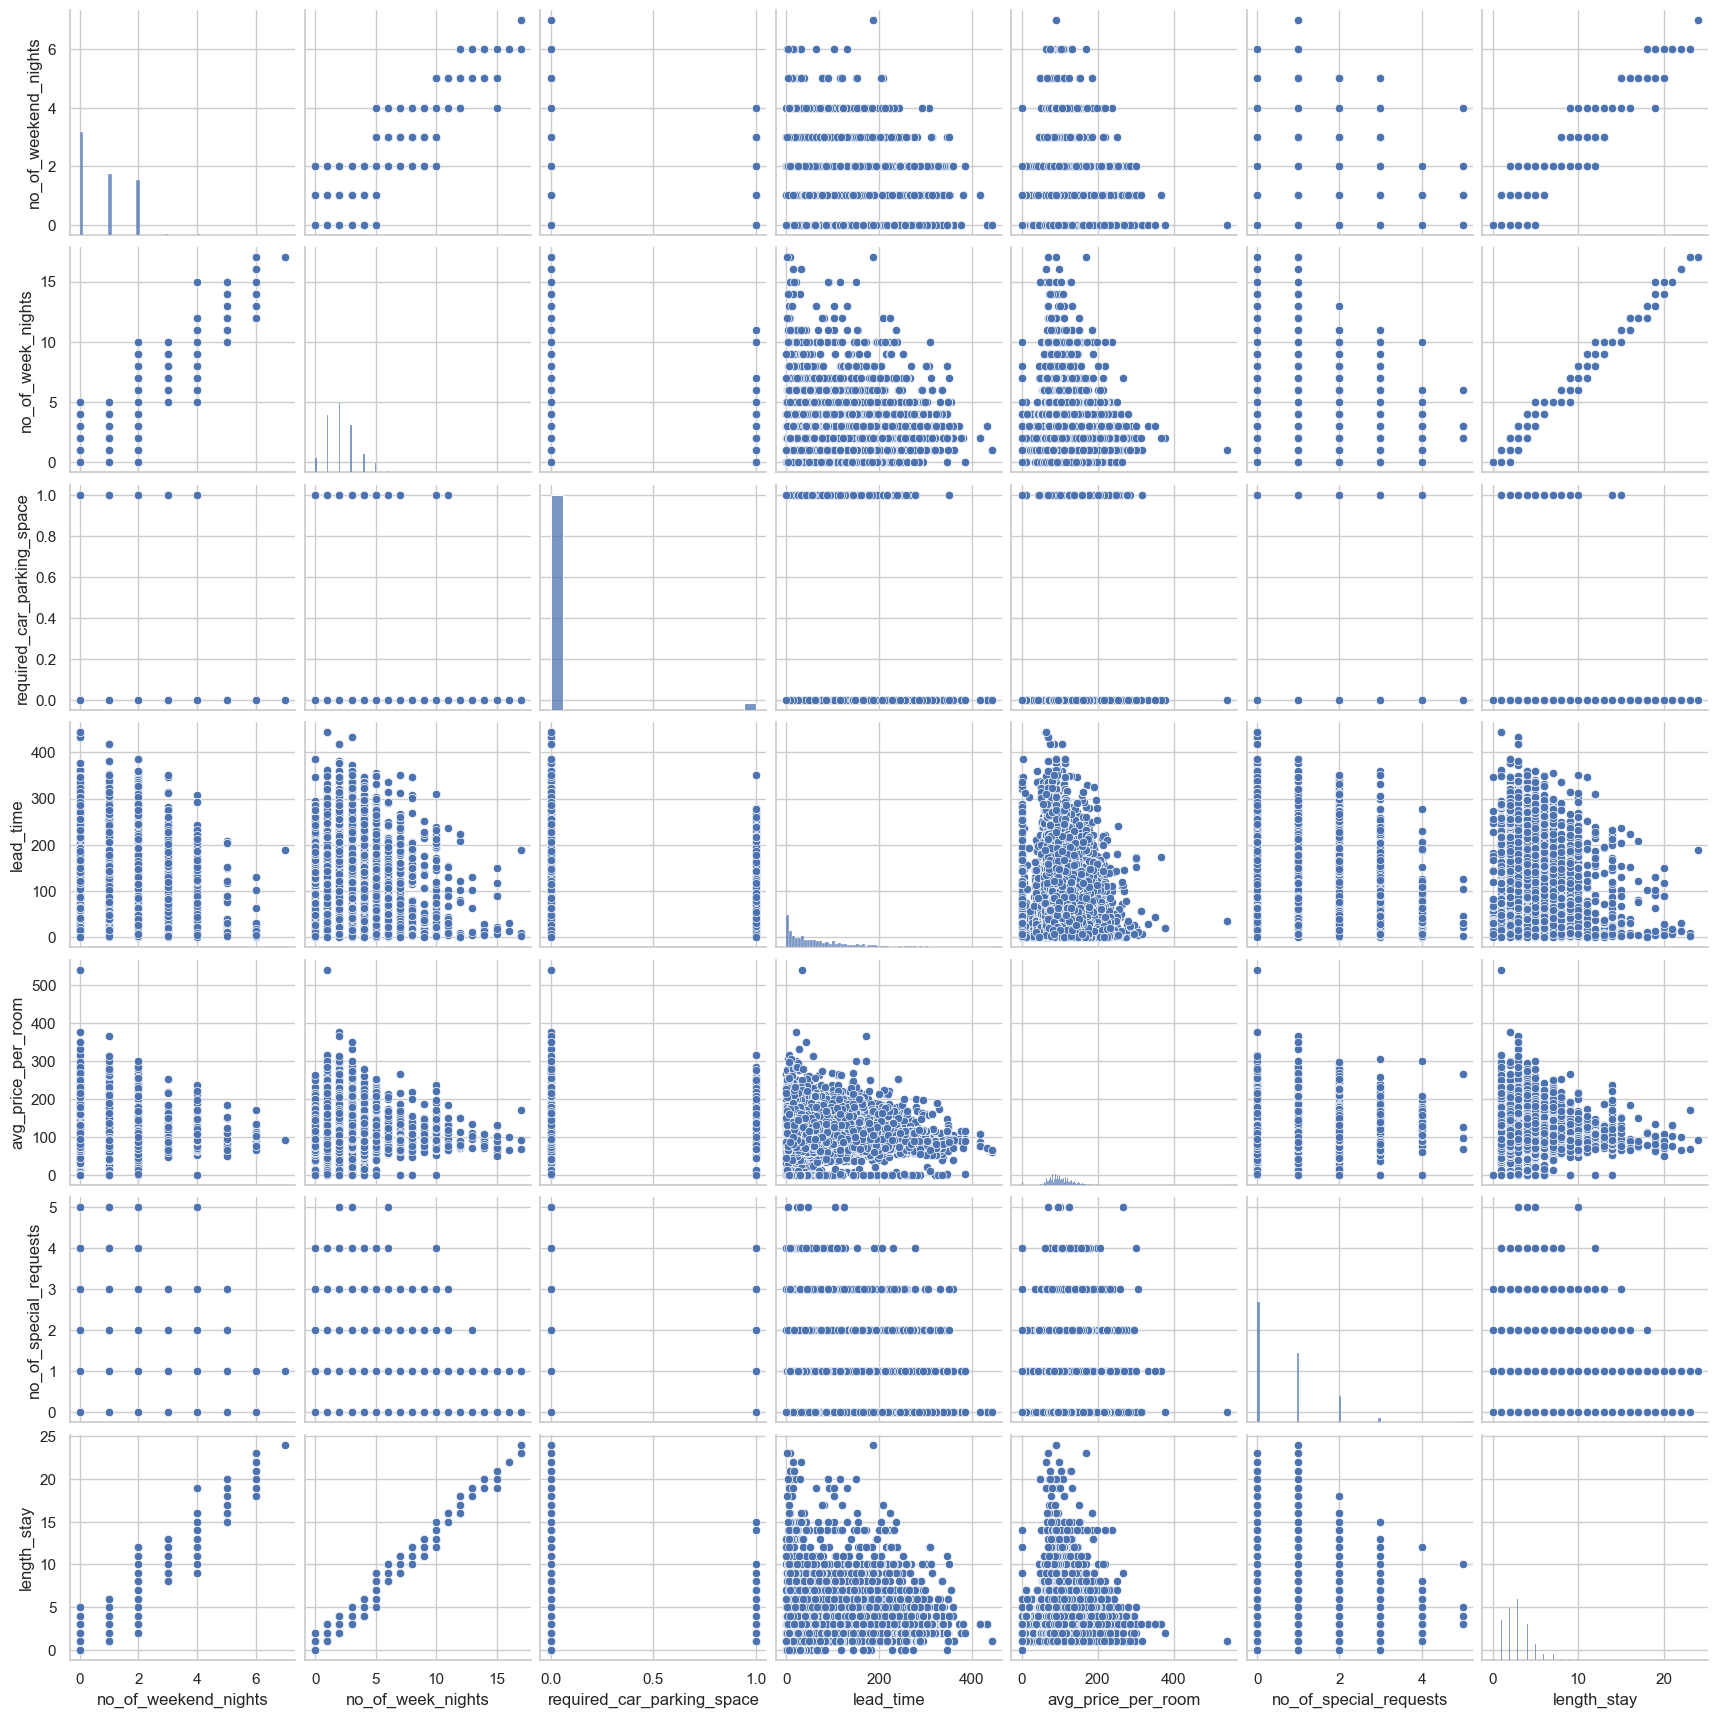

In [49]:
data['length_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

sns.pairplot(data[['no_of_weekend_nights','no_of_week_nights','required_car_parking_space',
                   'lead_time','avg_price_per_room','no_of_special_requests','type_of_meal_plan',
                   'room_type_reserved','market_segment_type','booking_status','length_stay']]);

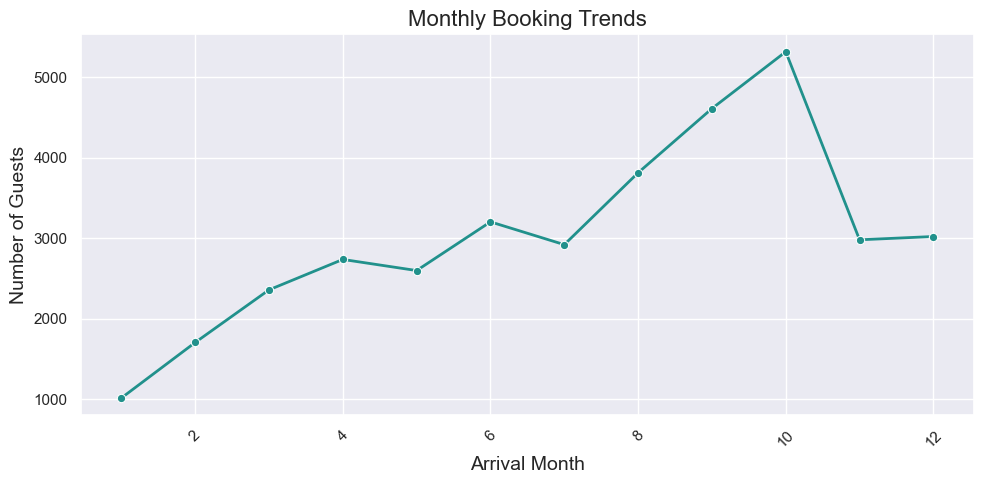

In [8]:
#Question 1 -



# Grouping the data by arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# Creating a DataFrame with months and count of customers in each month
monthly_data = pd.DataFrame({
    "Month": monthly_data.index,
    "Guests": monthly_data.values
})

# Setting the color palette
palette = sns.color_palette("viridis", n_colors=1)

# Plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests", color=palette[0], marker='o', linewidth=2)

# Adding titles and labels
plt.title('Monthly Booking Trends', fontsize=16)
plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Number of Guests', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid for easier interpretation

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


C:\Users\risha\AppData\Local\Temp\ipykernel_7432\3058711390.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=market_segment_data, x='market_segment_type', y='total_guests', palette='viridis')


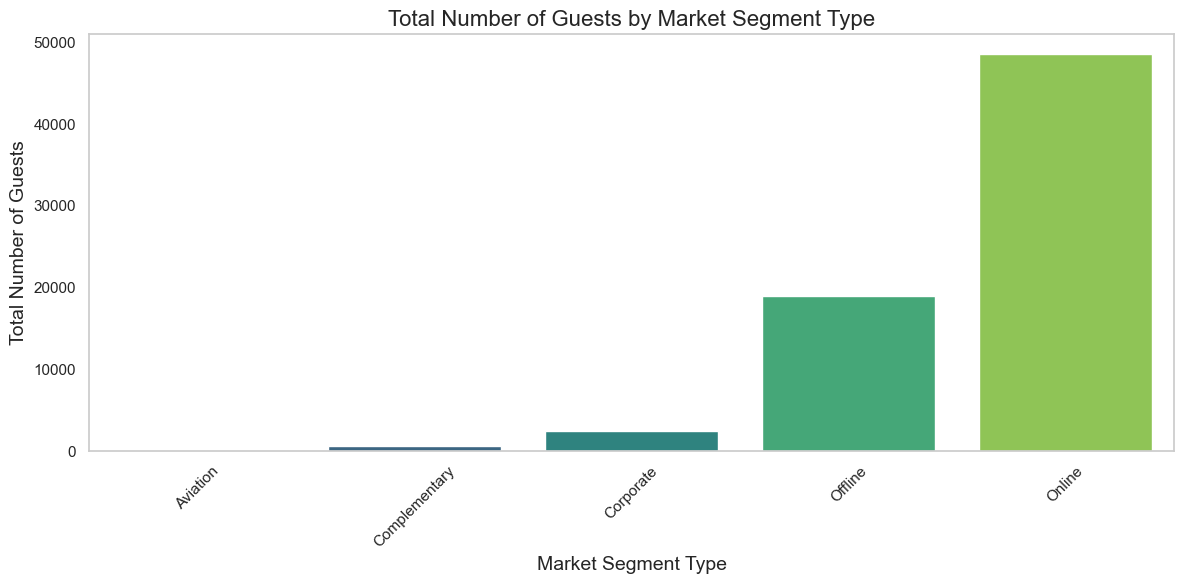

In [50]:
# Question 2 -



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['total_guests'] = data['no_of_adults'] + data['no_of_children']

# Grouping the data by market segment type and counting the number of guests
market_segment_data = data.groupby('market_segment_type')['total_guests'].sum().reset_index()

# Plotting the number of guests by market segment type
plt.figure(figsize=(12, 6))
sns.barplot(data=market_segment_data, x='market_segment_type', y='total_guests', palette='viridis')

# Adding titles and labels
plt.title('Total Number of Guests by Market Segment Type', fontsize=16)
plt.xlabel('Market Segment Type', fontsize=14)
plt.ylabel('Total Number of Guests', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add a grid for easier interpretation

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Number of bookings canceled: 11885
Percentage of canceled bookings: 32.76%


C:\Users\risha\AppData\Local\Temp\ipykernel_7432\3310482400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=booking_status_counts.index, y=booking_status_counts.values, palette='viridis')
C:\Users\risha\AppData\Local\Temp\ipykernel_7432\3310482400.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count + 5, f"{booking_status_percentages[i]:.1f}%", ha='center')


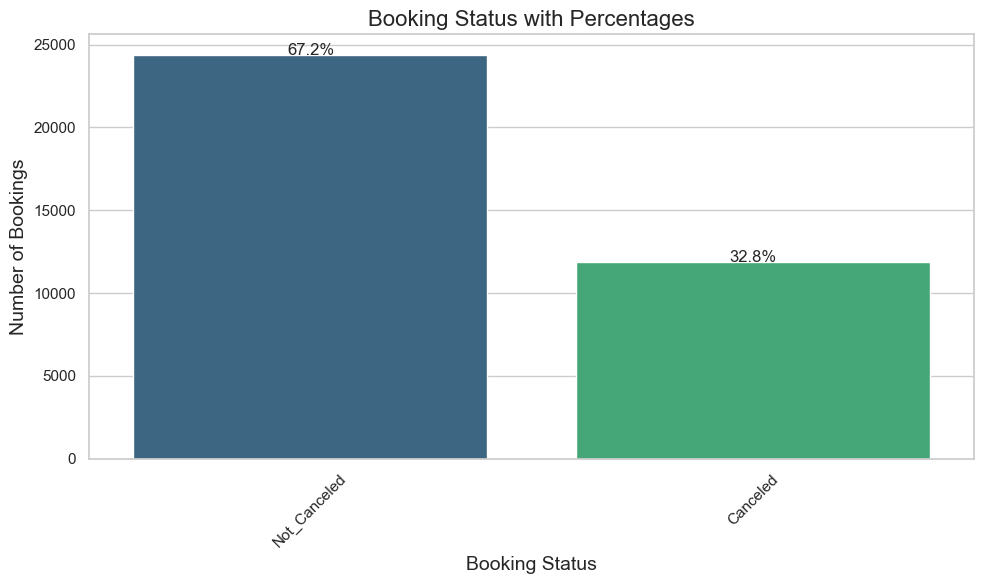

In [62]:
#Question 4 -


# Count the total number of bookings
total_bookings_count = data.shape[0]

# Count the number of canceled bookings
canceled_bookings_count = data[data['booking_status'] == 'Canceled'].shape[0]

# Calculate the percentage of canceled bookings
cancellation_percentage = (canceled_bookings_count / total_bookings_count) * 100

# Print the results
print(f'Number of bookings canceled: {canceled_bookings_count}')
print(f'Percentage of canceled bookings: {cancellation_percentage:.2f}%')

#labeled_barplot(axes[1], data, 'booking_status', perc=True)
booking_status_counts = data['booking_status'].value_counts()
booking_status_percentages = booking_status_counts / booking_status_counts.sum() * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=booking_status_counts.index, y=booking_status_counts.values, palette='viridis')

# Annotate the percentages on top of the bars
for i, count in enumerate(booking_status_counts):
    plt.text(i, count + 5, f"{booking_status_percentages[i]:.1f}%", ha='center')

# Adding titles and labels
plt.title('Booking Status with Percentages', fontsize=16)
plt.xlabel('Booking Status', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()



In [64]:
#Question 5-


# Count total repeating guests
total_repeating_guests = data[data['repeated_guest'] == 1].shape[0]

# Count repeating guests who canceled their bookings
canceled_repeating_guests = data[(data['repeated_guest'] == 1) & (data['booking_status'] == 'Canceled')].shape[0]

# Calculate the percentage of cancellations among repeating guests
if total_repeating_guests > 0:
    cancellation_percentage = (canceled_repeating_guests / total_repeating_guests) * 100
else:
    cancellation_percentage = 0  # Avoid division by zero if there are no repeating guests

print(f"Percentage of Repeating Guests Who Cancel: {cancellation_percentage:.2f}%")


Percentage of Repeating Guests Who Cancel: 1.72%


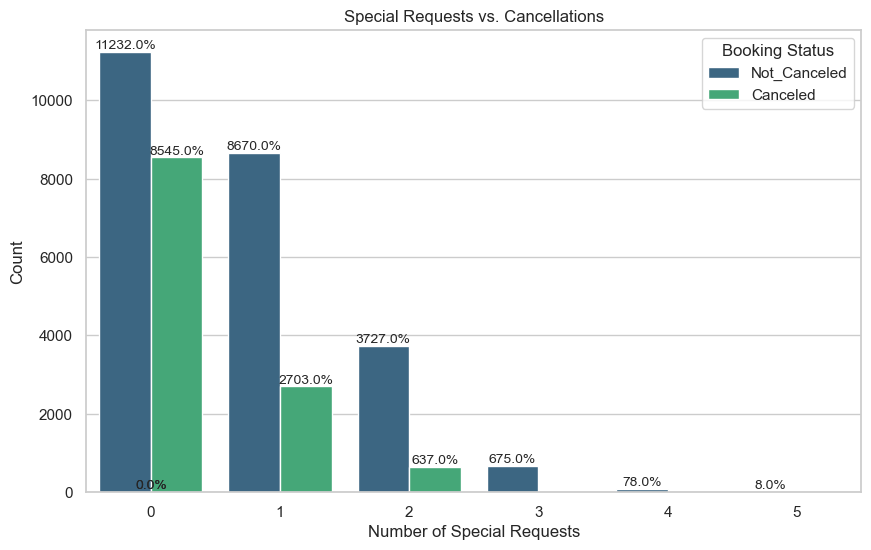

In [70]:
#Question 6 -


# Calculate counts and percentages
counts = data.groupby(['no_of_special_requests', 'booking_status']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plotting the count of special requests against booking status
plt.figure(figsize=(10, 6))
bars = sns.countplot(data=data, x='no_of_special_requests', hue='booking_status', palette='viridis')

# Adding percentage annotations
for p in bars.patches:
    # Get the height of the bar
    height = p.get_height()
    # Get the x position of the bar
    x = p.get_x() + p.get_width() / 2
    # Get the number of special requests (integer index)
    num_special_requests = int(p.get_x() + 0.5)  # Round to nearest integer

    if num_special_requests in percentages.index:  # Check if the index exists
        total = percentages.loc[num_special_requests].sum()
        percent = (height / total) * 100 if total > 0 else 0
        # Annotate the bar with percentage
        plt.annotate(f"{percent:.1f}%", (x, height), ha='center', va='bottom', fontsize=10)

plt.title('Special Requests vs. Cancellations')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()



In [9]:
#data = data.apply(pd.to_numeric, errors='coerce')

# Check the updated data types
#print(data.dtypes)

In [10]:
#dropping booking ID column

data = data.drop(["Booking_ID"], axis=1)

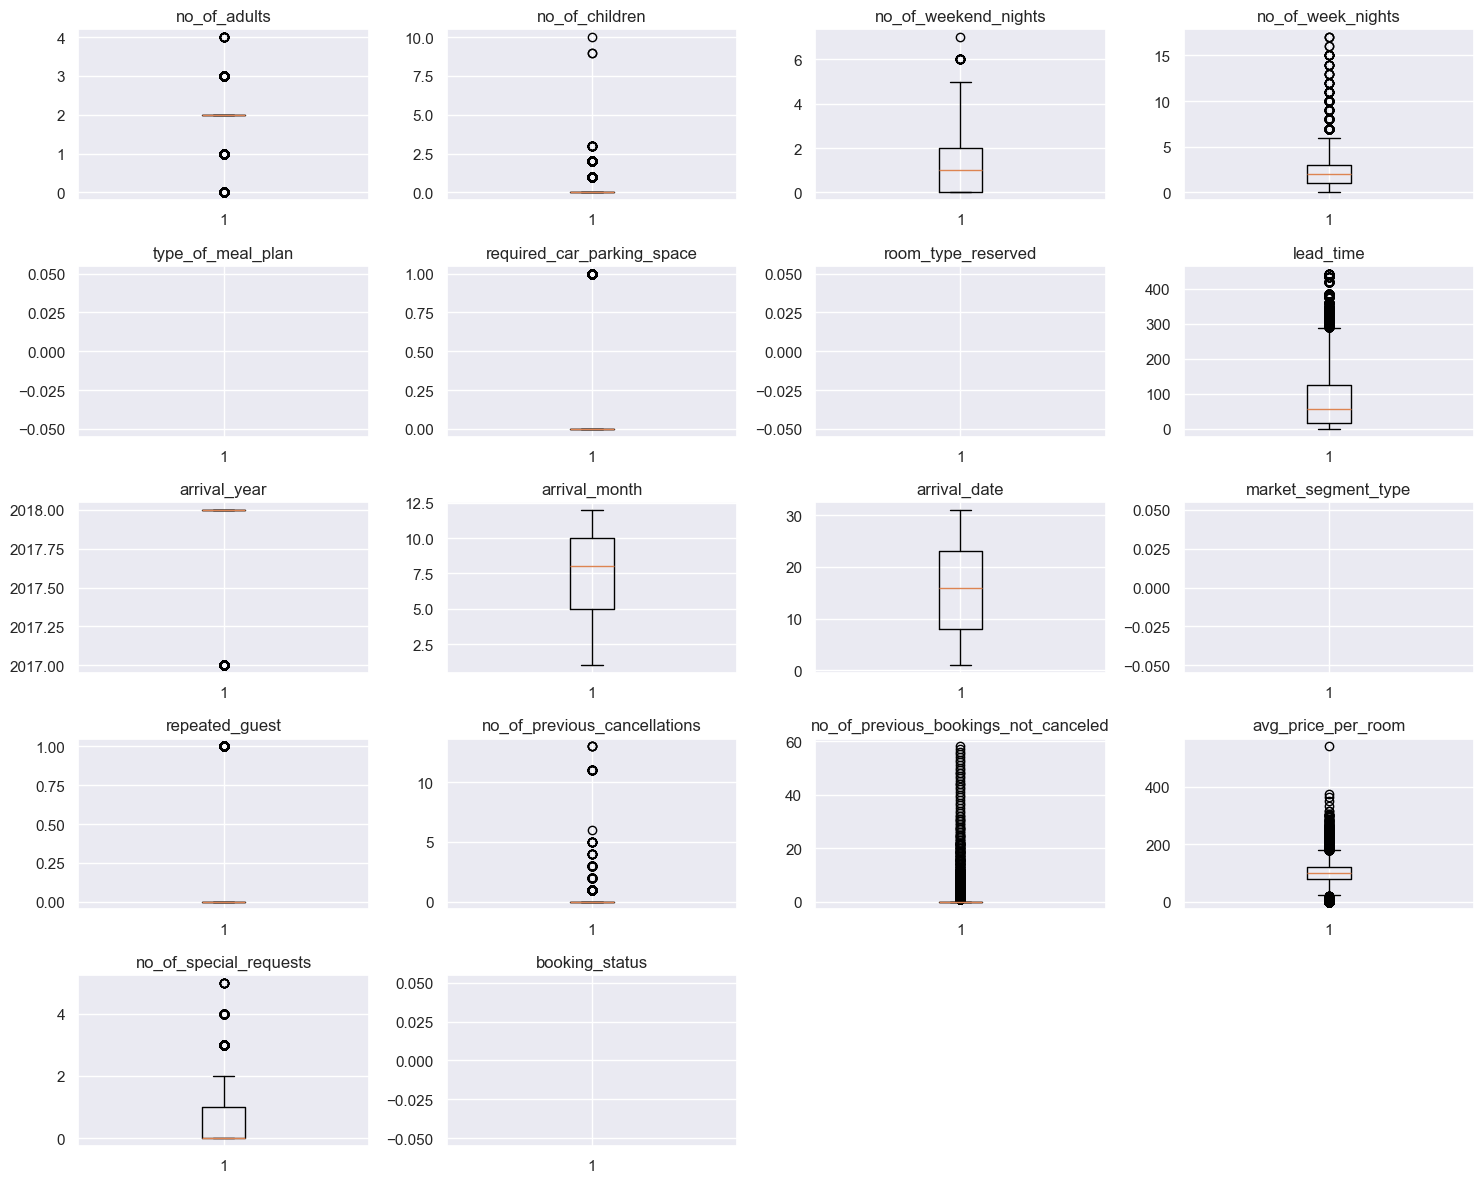

In [8]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [11]:
print(data.isnull().sum())

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [12]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [13]:
# Replace 'Not_Canceled' with 0 and 'Canceled' with 1
data['booking_status'] = data['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1})

# Confirm the replacement
print(data['booking_status'].value_counts())


booking_status
0    24390
1    11885
Name: count, dtype: int64


C:\Users\risha\AppData\Local\Temp\ipykernel_21216\1067188358.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['booking_status'] = data['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1})


In [14]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type_of_meal_plan'] = le.fit_transform(data['type_of_meal_plan'])
data['room_type_reserved'] = le.fit_transform(data['room_type_reserved'])
data['market_segment_type'] = le.fit_transform(data['market_segment_type'])


In [17]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  3                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  3                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        224          2017             10             2                    3   
1          5          2018             11             6                    4   
2          1          2018              2            28                    4   
3        211          2018              5            20                    4   
4         48          2018              4            11                    4   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int32  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int32  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [19]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [20]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 18)
Shape of test set :  (10883, 18)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


**Logical regression model**

In [21]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.3097
Time:                        10:39:02   Log-Likelihood:                -11107.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1213.7409    112.808    -10.759      0.000   -1434.841    -992.641
no_of_adults                             0.0564      

In [22]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [23]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [24]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

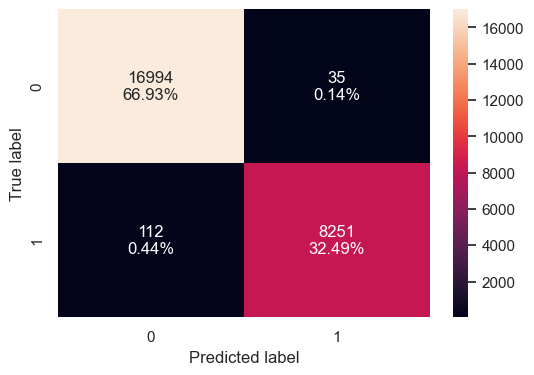

In [25]:
confusion_matrix_statsmodels(model0, X_train, y_train)

In [26]:
decision_tree_perf_train_without = model_performance_classification_statsmodels(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

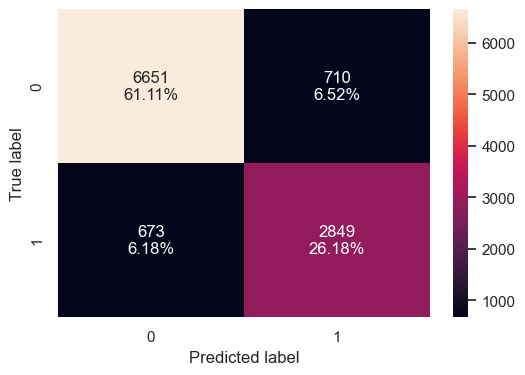

In [27]:
confusion_matrix_statsmodels(model0, X_test, y_test)

In [28]:
decision_tree_perf_test_without = model_performance_classification_statsmodels(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.87292 0.80892    0.80051 0.80469

In [29]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [30]:
checking_vif(X_train.astype(float))

feature            VIF
0                                  const 35639808.32681
1                           no_of_adults        1.29987
2                         no_of_children        1.25761
3                   no_of_weekend_nights        1.06382
4                      no_of_week_nights        1.08829
5                      type_of_meal_plan        1.15110
6             required_car_parking_space        1.03429
7                     room_type_reserved        1.53905
8                              lead_time        1.19118
9                           arrival_year        1.29244
10                         arrival_month        1.24812
11                          arrival_date        1.00526
12                   market_segment_type        1.56322
13                        repeated_guest        1.66692
14          no_of_previous_cancellations        1.38627
15  no_of_previous_bookings_not_canceled        1.64231
16                    avg_price_per_room        1.65102
17                no_of_special_requests        1.19224

**Dropping high p-values**

In [31]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train.astype(float)[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests']


In [32]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [33]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25379
Method:                           MLE   Df Model:                           12
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.3095
Time:                        10:42:46   Log-Likelihood:                -11111.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1204.5987    112.734    -10.685      0.000   -1425.553    -983.645
no_of_weekend_nights           0.1124      0.019      5.803      0.000       0.074 

In [34]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

Training performance:


Accuracy  Recall  Precision      F1
0   0.80525 0.61784    0.74711 0.67635

**Let's check the performance on the test set**

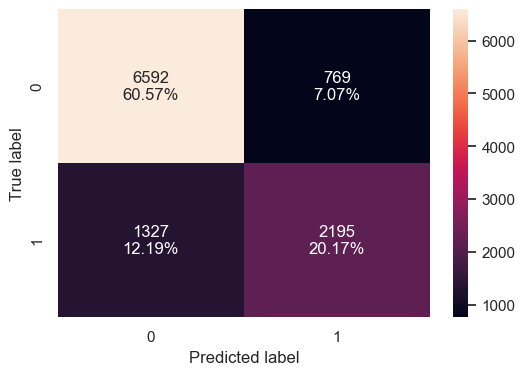

In [35]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float))

In [36]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float)
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80741 0.62323    0.74055 0.67684

In [37]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns)

Odds  Change_odd%
const                      0.00000   -100.00000
no_of_weekend_nights       1.11896     11.89554
no_of_week_nights          1.05227      5.22742
type_of_meal_plan          1.11533     11.53287
required_car_parking_space 0.23050    -76.95005
room_type_reserved         0.92070     -7.92953
lead_time                  1.01413      1.41282
arrival_year               1.80992     80.99239
arrival_month              0.96222     -3.77824
market_segment_type        3.21385    221.38493
repeated_guest             0.28629    -71.37132
avg_price_per_room         1.01877      1.87739
no_of_special_requests     0.25916    -74.08376

**Checking model performance on the training set**

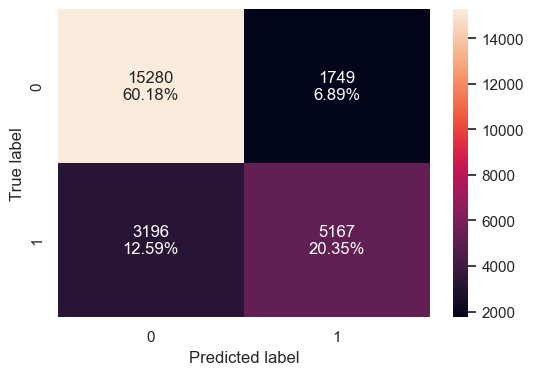

In [38]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

In [39]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float)
)
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80525 0.61784    0.74711 0.67635

**ROC-AUC on training set**

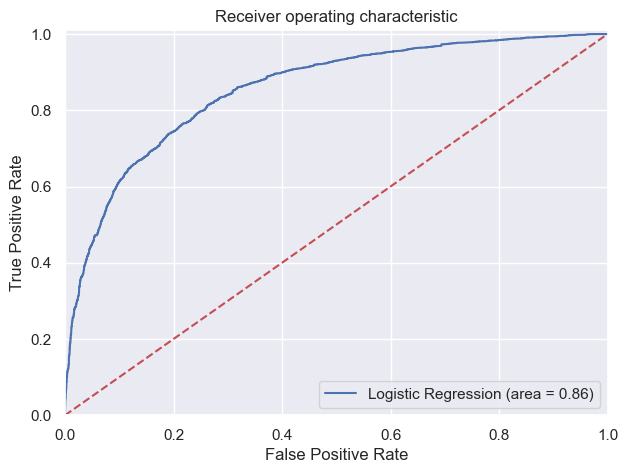

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc_train = roc_auc_score(y_train.astype(float), lg1.predict(X_train1.astype(float).astype(float)))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), lg1.predict(X_train1.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Model Performance Improvement**

**Let's explore whether we can enhance the recall score by adjusting the model threshold based on the AUC-ROC curve**

In [41]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), lg1.predict(X_train1.astype(float)))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.29038018800353244


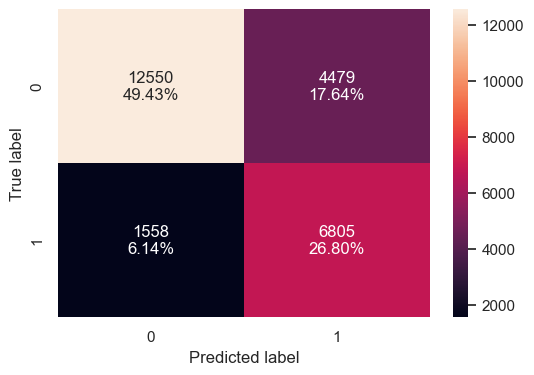

In [42]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_auc_roc
)

In [43]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.76225 0.81370    0.60307 0.69273

**Let's check the performance on the test set**

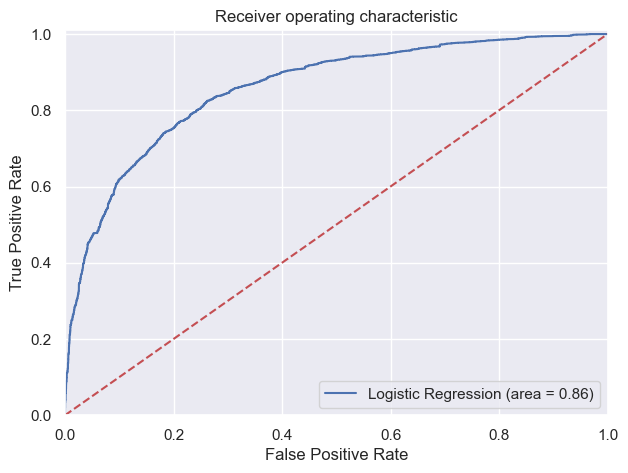

In [44]:
logit_roc_auc_train = roc_auc_score(y_test.astype(float), lg1.predict(X_test1.astype(float)))
fpr, tpr, thresholds = roc_curve(y_test.astype(float), lg1.predict(X_test1.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

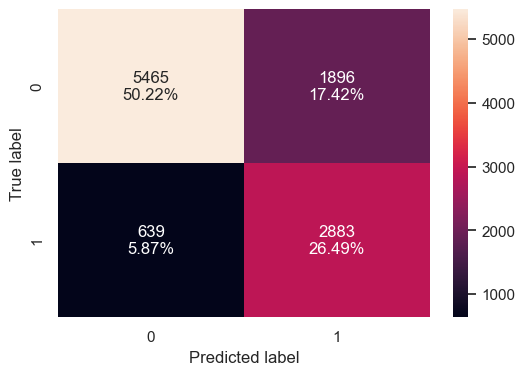

In [45]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc)

In [46]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.76707 0.81857    0.60326 0.69462

**Let's use Precision-Recall curve and see if we can find a better threshold**

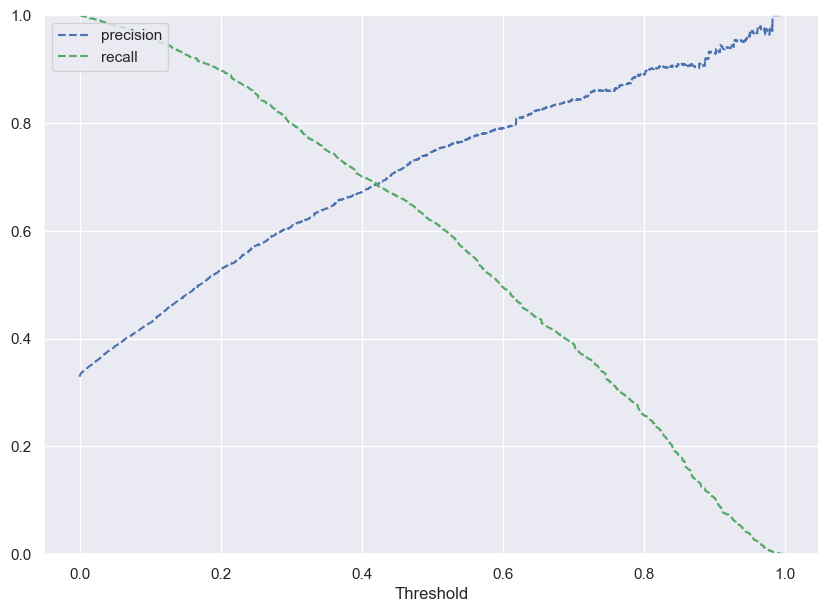

In [47]:
from sklearn.metrics import precision_recall_curve
y_scores = lg1.predict(X_train1.astype(float))
prec, rec, tre = precision_recall_curve(y_train.astype(float), y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**At 0.42 threshold we get a balanced precision and recall.**

In [48]:
# setting the threshold
optimal_threshold_curve = 0.42

**final checks**

Training performance:


Accuracy  Recall  Precision      F1
0   0.79332 0.68815    0.68553 0.68684

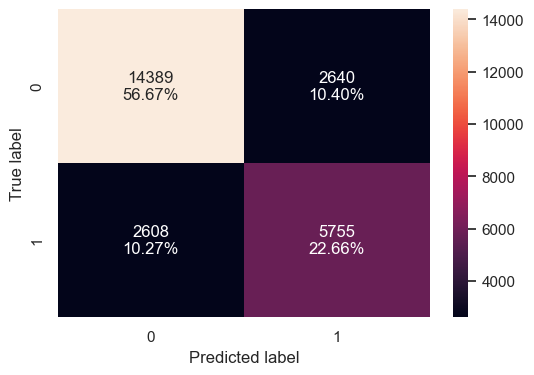

In [49]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_curve)
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

**Let's check the performance on the test set**

Test performance:


Accuracy  Recall  Precision      F1
0   0.79711 0.69052    0.68507 0.68778

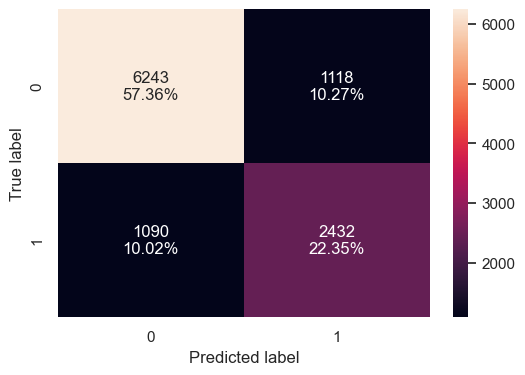

In [50]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve)
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

**Model performance summary**

In [51]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80525   
Recall                                   0.61784   
Precision                                0.74711   
F1                                       0.67635   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.76225   
Recall                                0.81370   
Precision                             0.60307   
F1                                    0.69273   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79332  
Recall                                0.68815  
Precision                             0.68553  
F1                                    0.68684

In [52]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80741   
Recall                                   0.62323   
Precision                                0.74055   
F1                                       0.67684   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.76707   
Recall                                0.81857   
Precision                             0.60326   
F1                                    0.69462   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79711  
Recall                                0.69052  
Precision                             0.68507  
F1                                    0.68778

**Data Preparation for modeling (Decision Tree)**

In [53]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [54]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 17)
Shape of test set :  (10883, 17)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


**Building Decision Tree Model**

In [55]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Checking model performance on training set**

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

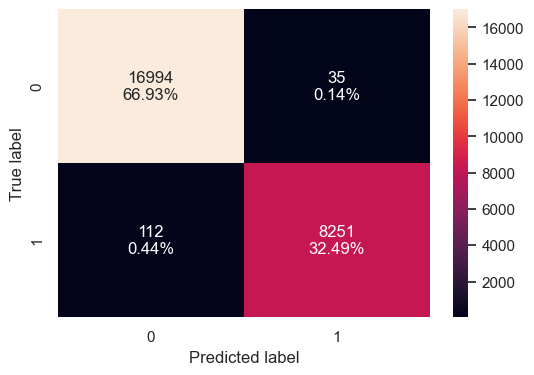

In [58]:
confusion_matrix_sklearn(model, X_train, y_train)
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

**Checking model performance on test set**

Accuracy  Recall  Precision      F1
0   0.87016 0.80494    0.79612 0.80051

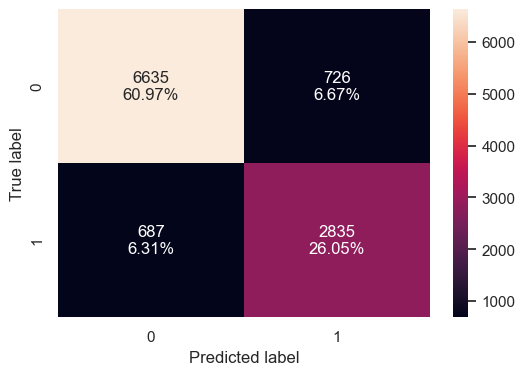

In [60]:
confusion_matrix_sklearn(model, X_test, y_test)
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

**PrePruning**

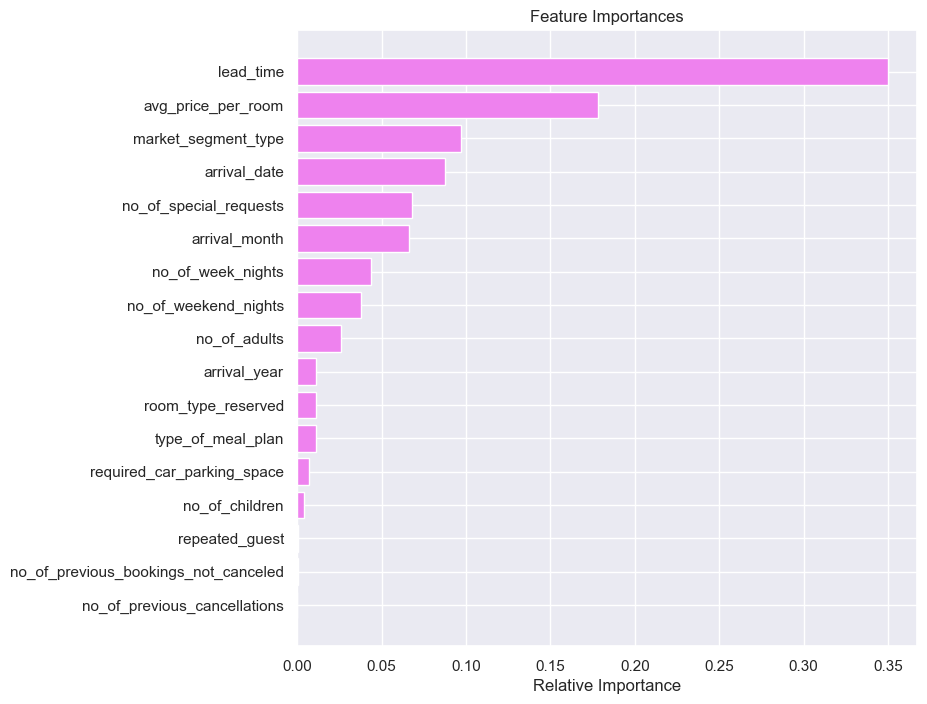

In [61]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [62]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

**Checking performance on training set**

Accuracy  Recall  Precision      F1
0   0.83101 0.78620    0.72428 0.75397

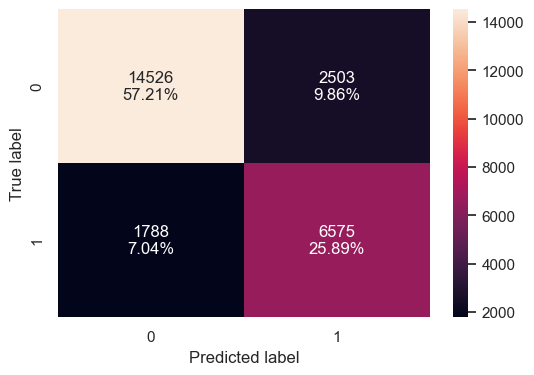

In [63]:
confusion_matrix_sklearn(estimator, X_train.astype(float), y_train.astype(float))
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

**Checking performance on test set**

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

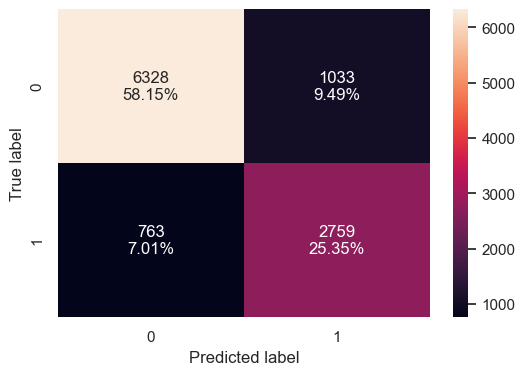

In [64]:
confusion_matrix_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

**Visualizing the Decision Tree***

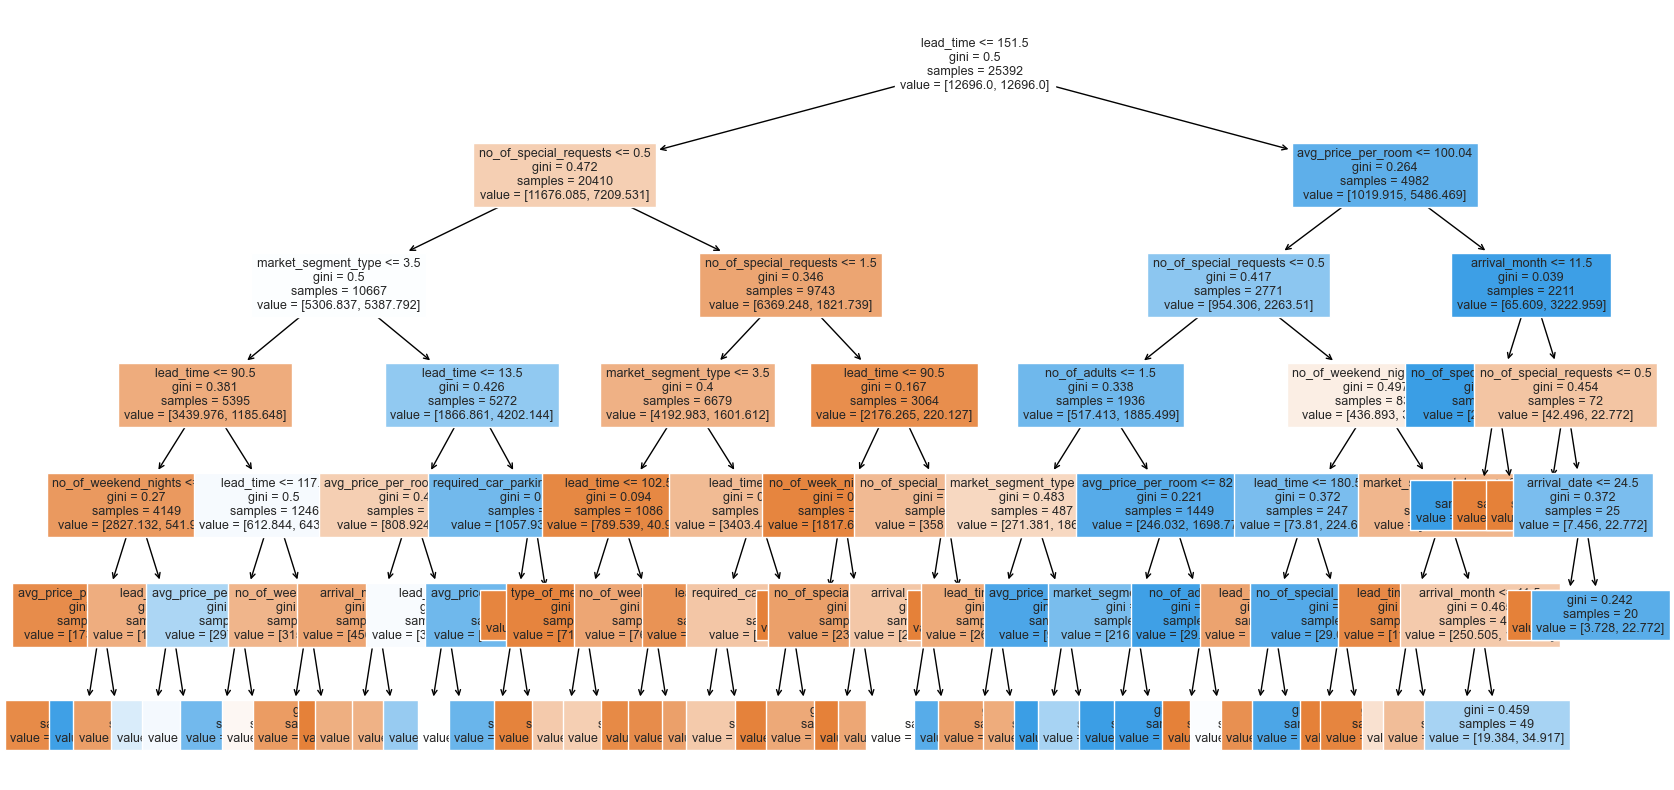

In [65]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [66]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 3.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] class: 

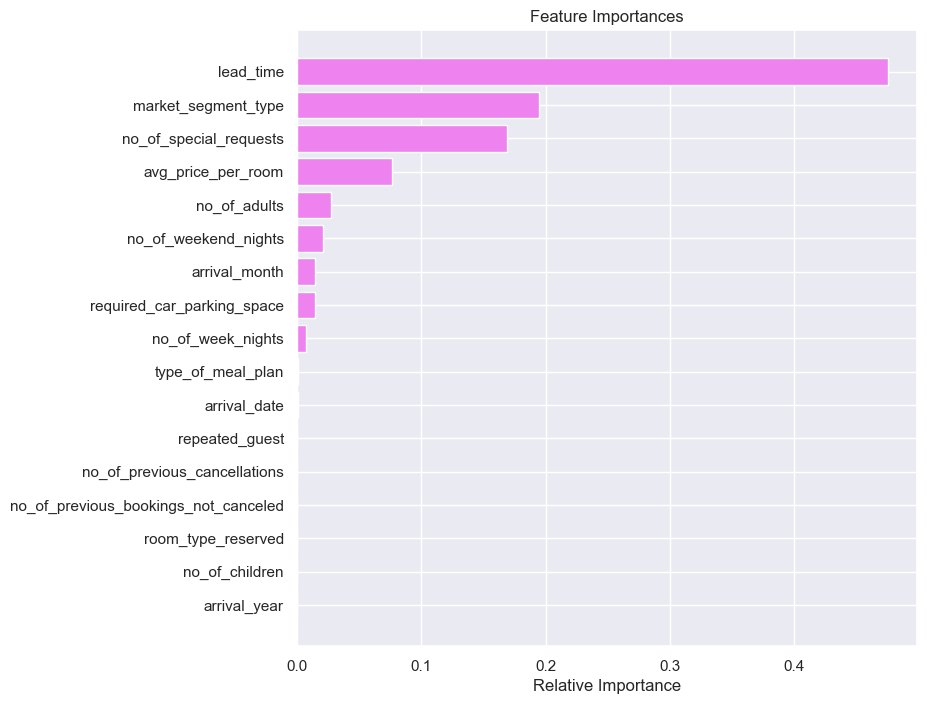

In [67]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Cost Complexity Pruning**

In [68]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [69]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1       -0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

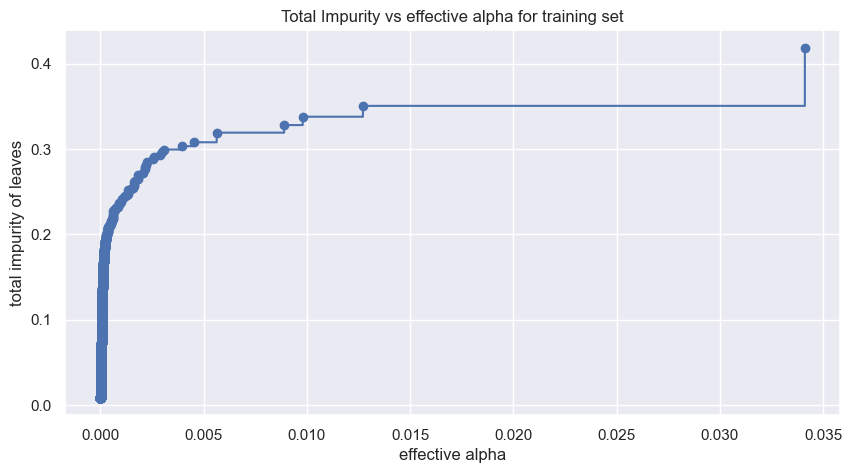

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Next, we train a decision tree using various effective alpha values. The final value in ccp_alphas represents the alpha that prunes the entire tree, resulting in clfs[-1], a tree with only one node.**

In [72]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137065


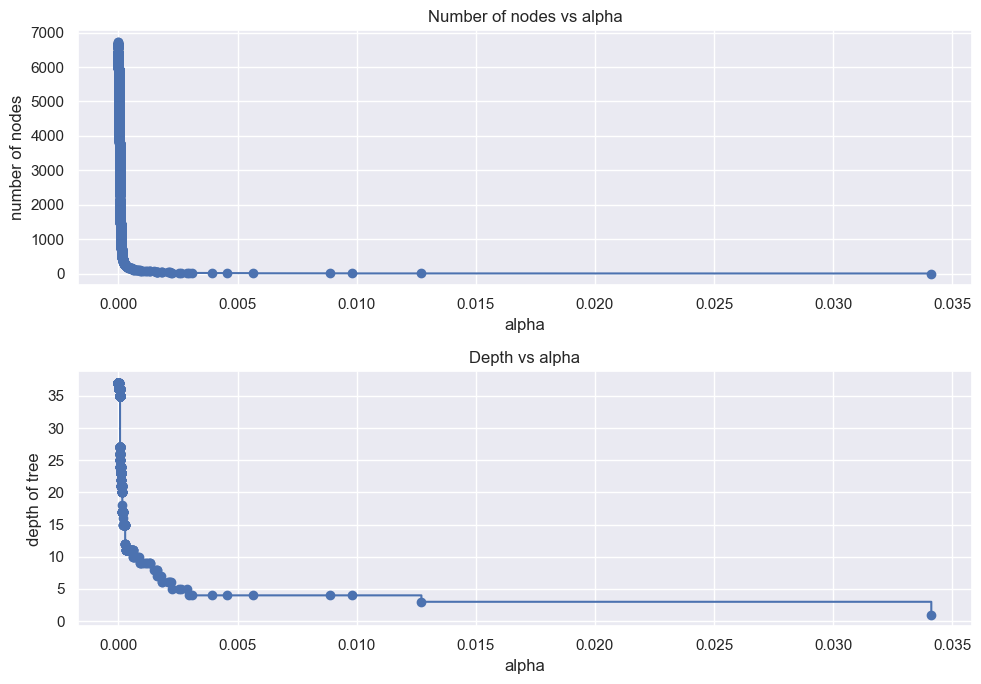

In [73]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**F1 Score vs alpha for training and testing sets**

In [74]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

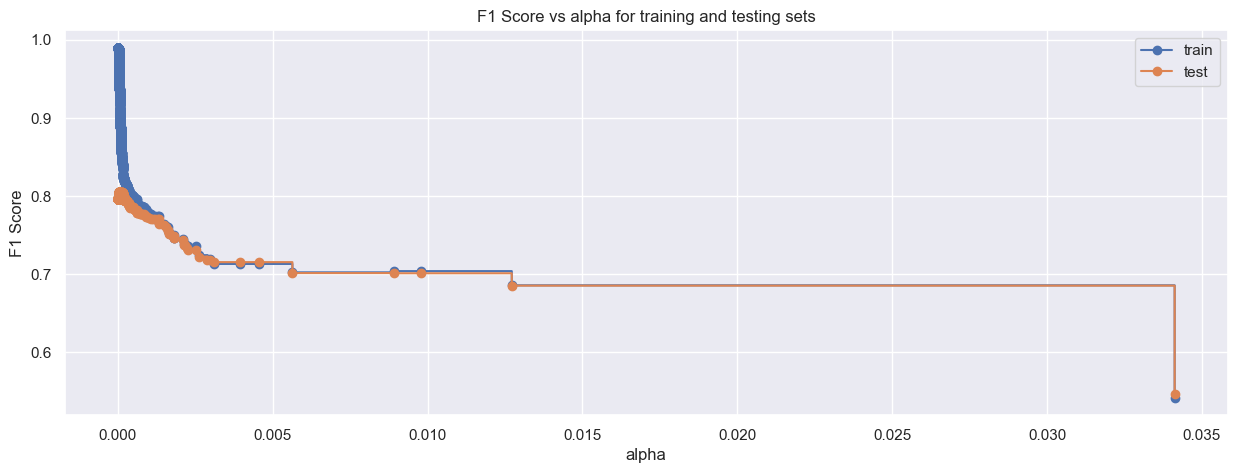

In [75]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [76]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001439672571203496, class_weight='balanced',
                       random_state=1)


**Checking performance on training set**

Accuracy  Recall  Precision      F1
0   0.89209 0.89143    0.80274 0.84476

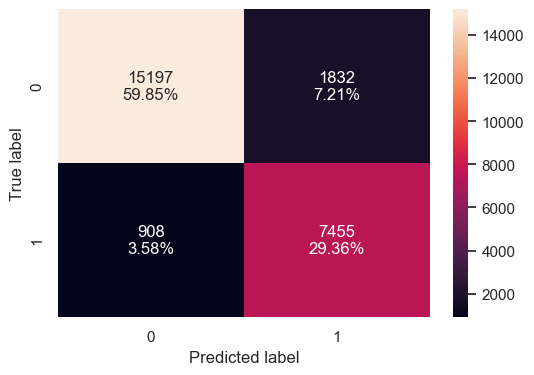

In [77]:
confusion_matrix_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

**Checking performance on test set**

Accuracy  Recall  Precision      F1
0   0.86695 0.85236    0.76387 0.80569

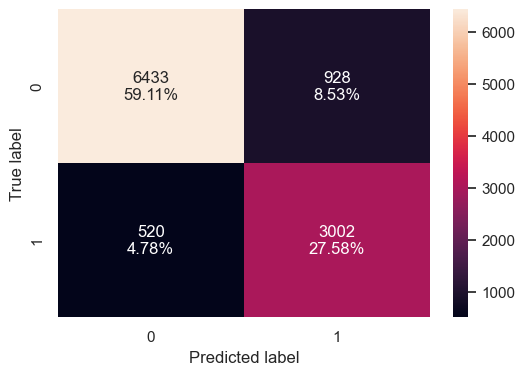

In [78]:
confusion_matrix_sklearn(best_model, X_test, y_test)
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

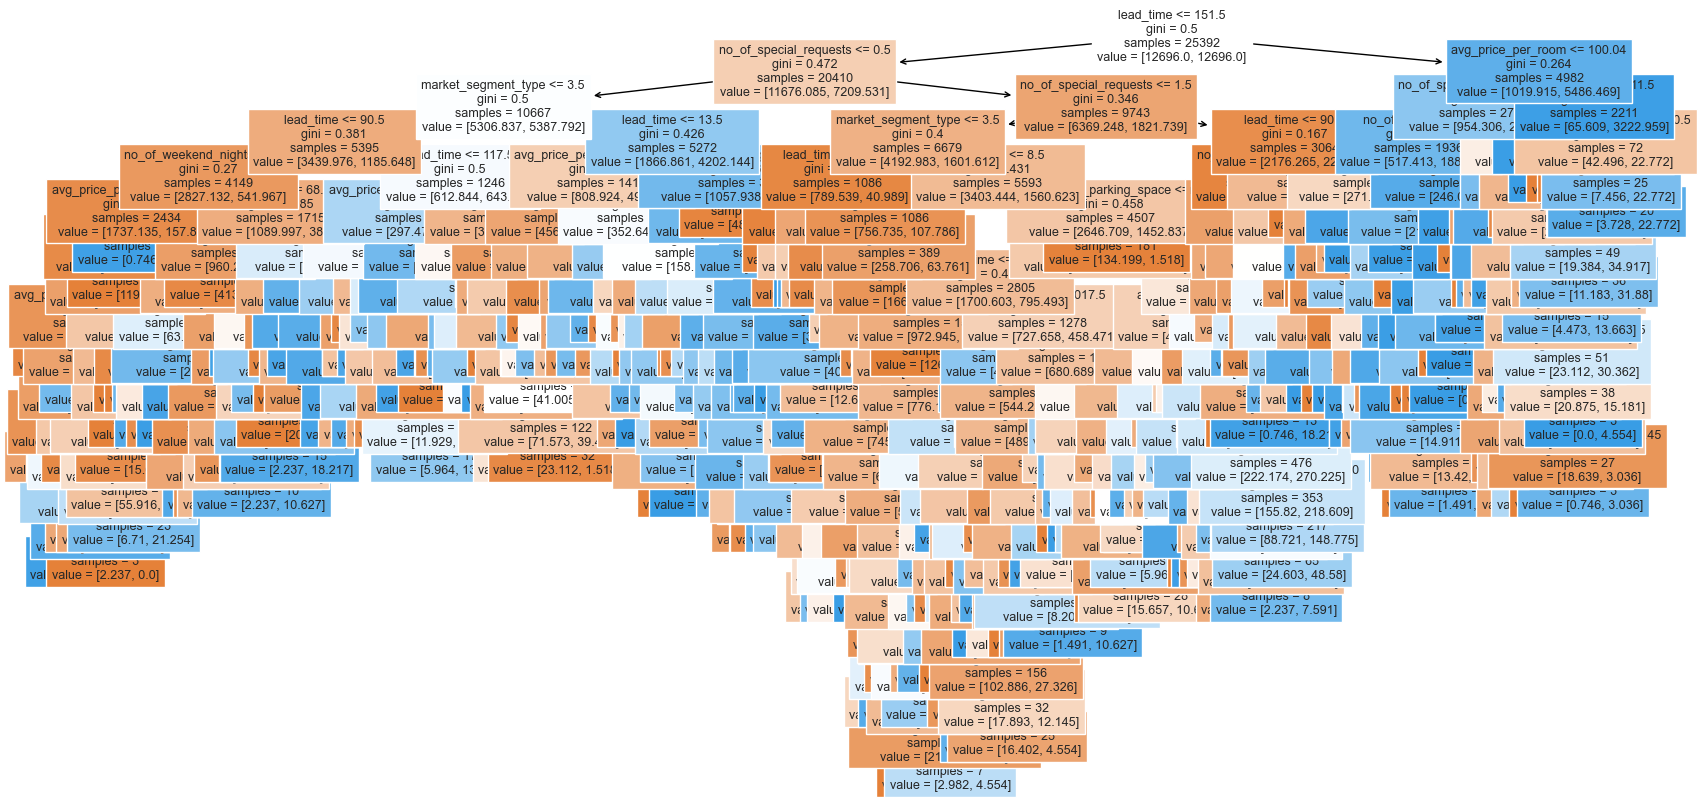

In [79]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [80]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 3.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type <= 2.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |   |   |   |   

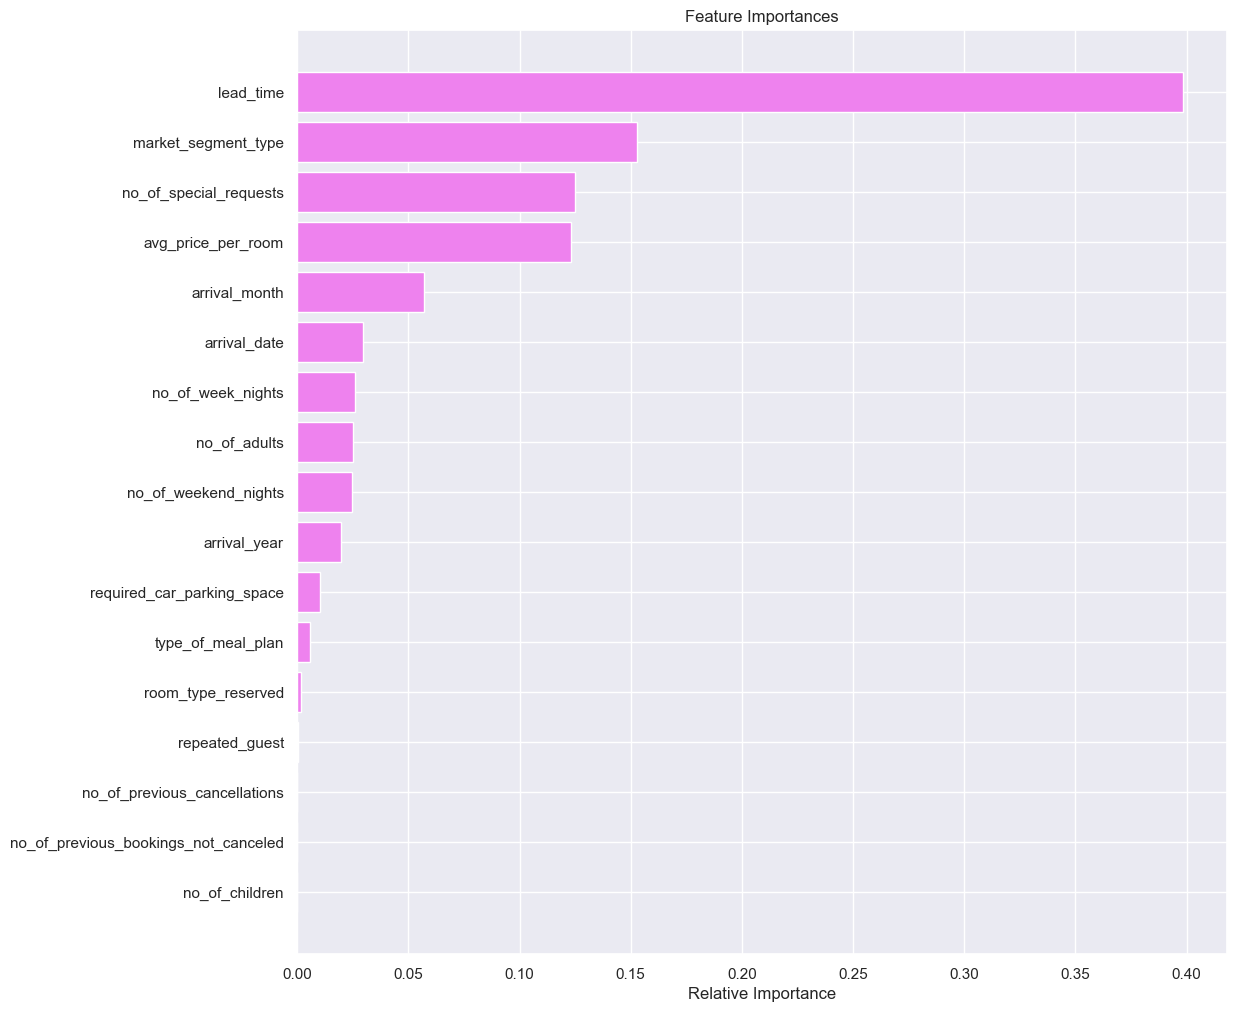

In [81]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Comparing Decision Tree models**

In [82]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83101   
Recall                   0.98661                      0.78620   
Precision                0.99578                      0.72428   
F1                       0.99117                      0.75397   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89209  
Recall                          0.89143  
Precision                       0.80274  
F1                              0.84476

In [83]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87016                      0.83497   
Recall                   0.80494                      0.78336   
Precision                0.79612                      0.72758   
F1                       0.80051                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86695  
Recall                          0.85236  
Precision                       0.76387  
F1                              0.80569